Dataset [Link](https://www.kaggle.com/datasets/datasnaek/youtube-new)

* For this project, we decided to use the `Extracted YouTube Trending Videos dataset` from Kaggle. Dataset was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day(up tp 200 listed trending videos per day).It contains data about more than 40,000 trending videos.
* Following is a detailed description of the 16 columns:
<br>
1.`video_id`: identification code for the YouTube Video
<br>
2.`trending_date`: Date on which the video was trending. 
<br>
3.`title`: Title of the YouTube Video
<br>
4.`Channel_title`: title of the YouTube Channel uploading the video
<br>
5.`Category_id`: Unique ID of the video's Category(e.g.Entertainment,Music,Sports)
<br>
6.`Publish_time`:Date and Time in which the video was published
<br>
7.`Tags`: Hashtags added to the Video to make it easier to find by the public
<br>
8.`Views`: Number of views the video obtained by the time the dataset was gathered
<br>
9.`likes`: Number of likes the video obtaind by the time the dataset was gathered
<br>
10.`dislikes`: number of dislikes the video obtained by the time the dataset was gathered
<br>
11.`comment_count`: number of comments the video obtained by the time the dataset was gathered
<br>
12.`Comments_disabled`: dummy variable indicating whether the comments were disabled on the video.
<br>
13.`ratings_disabled`: dummy variable indicating whether the ratings were disabled on the video.
<br>
14.`video_error_or_removed`: dummy variable indicating the presence of a video error or removal of the video.
<br>
15.`thumbnail_link`: thumbnail link of the video
<br>
16.`description`: a piece of metadata that helps YouTube understand the content of a video. 
<br>
In this project we will work with these attributes: `video_id`, `trending_date`, `Category_id`, `Publish_time`, `Views`, `likes`, `dislikes`, `comment_count`, `Comments_disabled`, `ratings_disabled`, `video_error_or_removed`

In [ ]:
from google.colab import drive
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting seeds for generating reproducible results
seed = 42
np.random.seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)
random.seed(seed)

In [ ]:
# loading Dataframe
df_main = pd.read_csv('CAvideos.csv').reset_index().drop(["index"], axis=1)

# Parsing date columns
df_main['trending_date'] =  pd.to_datetime(df_main['trending_date'], format='%y.%d.%m')
df_main['publish_time'] = pd.to_datetime(df_main['publish_time']).dt.tz_localize(None)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40881 non-null  object        
 1   trending_date           40881 non-null  datetime64[ns]
 2   title                   40881 non-null  object        
 3   channel_title           40881 non-null  object        
 4   category_id             40881 non-null  int64         
 5   publish_time            40881 non-null  datetime64[ns]
 6   tags                    40881 non-null  object        
 7   views                   40881 non-null  int64         
 8   likes                   40881 non-null  int64         
 9   dislikes                40881 non-null  int64         
 10  comment_count           40881 non-null  int64         
 11  thumbnail_link          40881 non-null  object        
 12  comments_disabled       40881 non-null  bool  

In [ ]:
#how long does a video takes to become trending, we add a new column called 'duration' 
df_main['duration'] = df_main['trending_date'] - df_main['publish_time'] 

In [ ]:
df_main.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,duration
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,3 days 06:59:57
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,0 days 07:00:00


In [ ]:
# the data collected on how many days?
print(' The data is collected over {} days'. format(df_main['trending_date'].nunique()))

 The data is collected over 205 days


In [ ]:
# extract the columns that we will work with
df =df_main.drop(["tags","description","thumbnail_link",'title','channel_title'] ,axis=1)
df.head()

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,duration
0,n1WpP7iowLc,2017-11-14,10,2017-11-10 17:00:03,17158579,787425,43420,125882,False,False,False,3 days 06:59:57
1,0dBIkQ4Mz1M,2017-11-14,23,2017-11-13 17:00:00,1014651,127794,1688,13030,False,False,False,0 days 07:00:00
2,5qpjK5DgCt4,2017-11-14,23,2017-11-12 19:05:24,3191434,146035,5339,8181,False,False,False,1 days 04:54:36
3,d380meD0W0M,2017-11-14,24,2017-11-12 18:01:41,2095828,132239,1989,17518,False,False,False,1 days 05:58:19
4,2Vv-BfVoq4g,2017-11-14,10,2017-11-09 11:04:14,33523622,1634130,21082,85067,False,False,False,4 days 12:55:46


### description of numerical columns

In [ ]:
stats = ['mean', 'median', 'std', 'min', 'max']
agg_dict = {'views': stats, 'likes': stats, 'dislikes': stats, 'comment_count': stats}
desc_stats = df.agg(agg_dict)
desc_stats

,views,likes,dislikes,comment_count
mean,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
median,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
std,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


 first we calculate the centrality and spread measures of the numerical data in our dataset(`views` , `likes` , `dislikes` , `comment_count`) to see how the data behaves. 

we can see that there's some indication that the columns seem to have some great spread(the standard deviation is high for all these four attributes). for all these four attributes mean and medians are apart. This might indicate these variables do not have a normal distribution. 

The average number of views of a trending video is 1,147,035. The median value for the number of views is 371,204, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number. the maximum number of views for a video is 137,000,000.

The average number of likes of a trending video is 39,582. The median value is 8,700. the maximum number of likes for a video is 5,000,000.


while the average number of dislikes is 2,009. The median value is 300. the maximum number of dislikes for a video is 1,600,000. 

The Average comment count is 5,042 while the median is 1,301. the maximum number of comment count is 1,110,000.



let's explore more!
both histogram and boxplot are useful for exploring and presenting data. histograms are better in displaying the underlying probability distribution of data. Box plots on the other hand are more useful when comparing between several data sets. They are less detailed. so we use histogram for exploring data distribution. 

#### Views Histogram
let's plot a histogram for the views column to take a look at its distribution

(array([0.0e+00, 1.0e+07, 2.0e+07, 3.0e+07, 4.0e+07, 5.0e+07, 6.0e+07,
        7.0e+07, 8.0e+07, 9.0e+07, 1.0e+08, 1.1e+08, 1.2e+08, 1.3e+08]),
 <a list of 14 Text major ticklabel objects>)

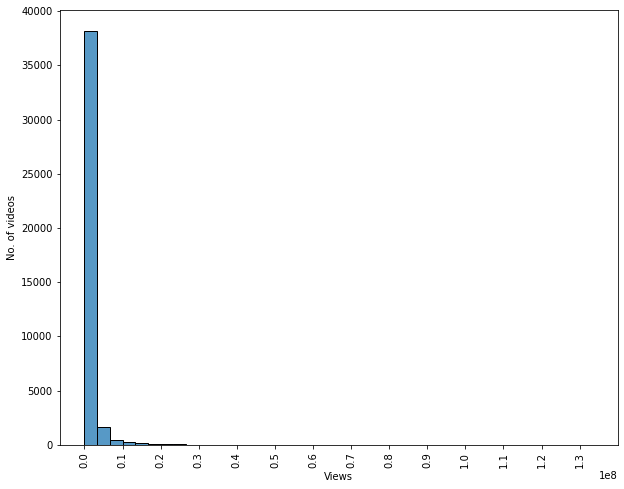

In [ ]:
#df['views'].max():1.3e8
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df, x='views' , bins=np.linspace(0, 1.3e8, 40),ax=ax)
ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 1.4e8, 1e7))
ax.set_xlim(right=1.4e8)
plt.xticks(rotation=90)

to get a closer look at the distribution of the data, we compute the 90% quantile for the data in the column 'views. We note that the vast majority of trending videos have 2.3 million views or less. 

In [ ]:
df['views'].quantile(0.9)

2367796.0

Now let us plot the histogram just for videos with 2.5 million views or less to get a closer look at the distribution of the data

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'Views')]

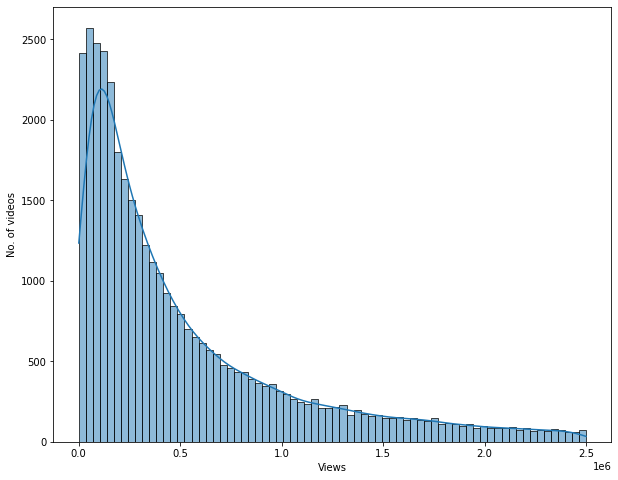

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
df_hist = df[df["views"] < 2.5e6]
sns.histplot(data=df_hist, x='views', kde=True)
ax.set(xlabel="Views", ylabel="No. of videos")

result interpretation: as we can see from the above plot the data in `views` column is right skewed.  skewness tells us about the direction of outliers. You can see that our distribution is positively skewed and most of the outliers are present on the right side of the distribution. Since our data is positively skewed here, it means that it has a higher number of data points having low values

#### likes histogram
we plot the histogram for *'likes'* column

In [ ]:
df['likes'].max()

5053338

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.]),
 <a list of 9 Text major ticklabel objects>)

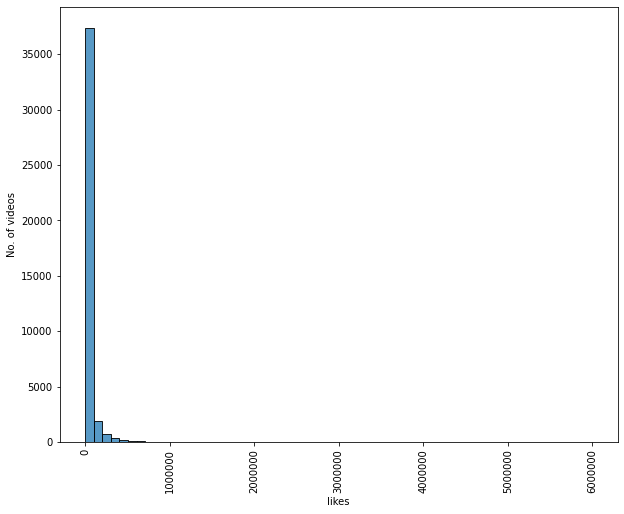

In [ ]:
#df['likes'].max():5,053,338  
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df, x='likes' , bins=np.linspace(0, 6e6, 60),ax=ax)
ax.set(xlabel="likes", ylabel="No. of videos" )
ax.ticklabel_format(style='plain')
plt.xticks(rotation=90)

to get a closer look at the distribution of the data, we compute the 90% quantile for the data in the column *'likes'*. We note that the vast majority of trending videos have 86,000 likes or less. 

In [ ]:
df['likes'].quantile(0.9)

86271.0

Now let us plot the histogram just for videos with 86,000 likes or less to get a closer look at the distribution of the data

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'likes')]

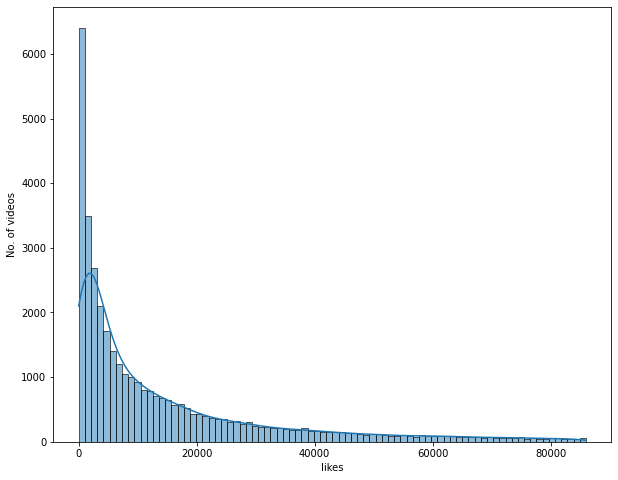

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
df_hist = df[df["likes"] < 86e3]
sns.histplot(data=df_hist, x='likes', kde=True)
ax.set(xlabel="likes", ylabel="No. of videos")

Interpretation of results: as we can see from the above plot the data in `likes` column is right skewed.  skewness tells us about the direction of outliers. You can see that our distribution is positively skewed and most of the outliers are present on the right side of the distribution. Since our data is positively skewed here, it means that it has a higher number of data points having low values

#### dislikes histogram
we plot the histogram for *'dislikes'* column

In [ ]:
df['dislikes'].max()

1602383

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]), <a list of 8 Text major ticklabel objects>)

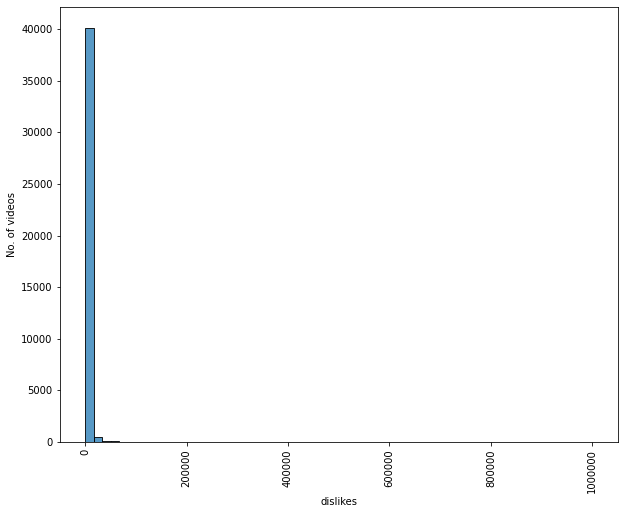

In [ ]:
#df['dislikes'].max():1,602,383  
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df, x='dislikes' , bins=np.linspace(0, 1e6, 60),ax=ax)
ax.set(xlabel="dislikes", ylabel="No. of videos" )
ax.ticklabel_format(style='plain')
plt.xticks(rotation=90)

to get a closer look at the distribution of the data, we compute the 90% quantile for the data in the column *'dislikes'*. We note that the vast majority of trending videos have 3020 dislikes or less. 

In [ ]:
df['dislikes'].quantile(0.9)

3020.0

Now let us plot the histogram just for videos with 3020 dislikes or less to get a closer look at the distribution of the data

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'dislikes')]

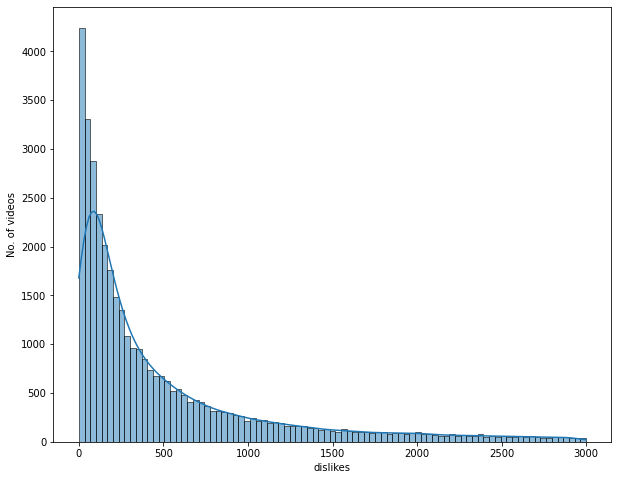

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
df_hist = df[df["dislikes"] < 3e3]
sns.histplot(data=df_hist, x='dislikes', kde=True)
ax.set(xlabel="dislikes", ylabel="No. of videos")

interpretation of results: as we can see from the above plot the data in `dislikes` column is right skewed.  skewness tells us about the direction of outliers. You can see that our distribution is positively skewed and most of the outliers are present on the right side of the distribution. Since our data is positively skewed here, it means that it has a higher number of data points having low values

#### comment_count histogram
we plot the histogram for *'comment_count'* column

In [ ]:
df['comment_count'].max()

1114800

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]), <a list of 8 Text major ticklabel objects>)

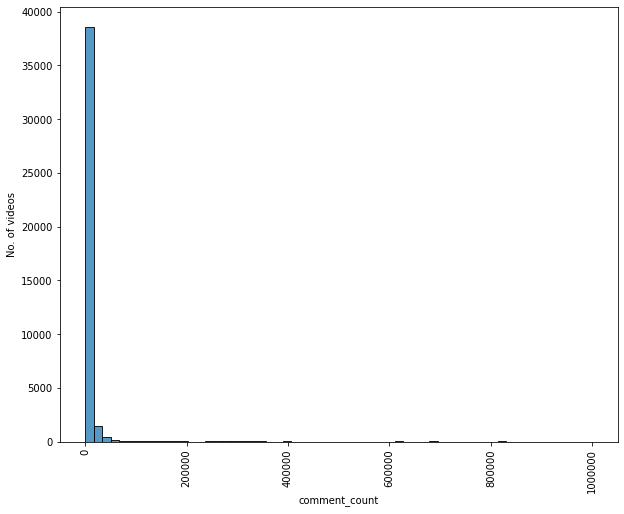

In [ ]:

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df, x='comment_count' , bins=np.linspace(0, 1e6, 60),ax=ax)
ax.set(xlabel="comment_count", ylabel="No. of videos" )
ax.ticklabel_format(style='plain')
plt.xticks(rotation=90)

to get a closer look at the distribution of the data, we compute the 90% quantile for the data in the column *'comment_count'*. We note that the vast majority of trending videos have 10270 comment_count or less. 

In [ ]:
df['comment_count'].quantile(0.9)

10270.0

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'comment count')]

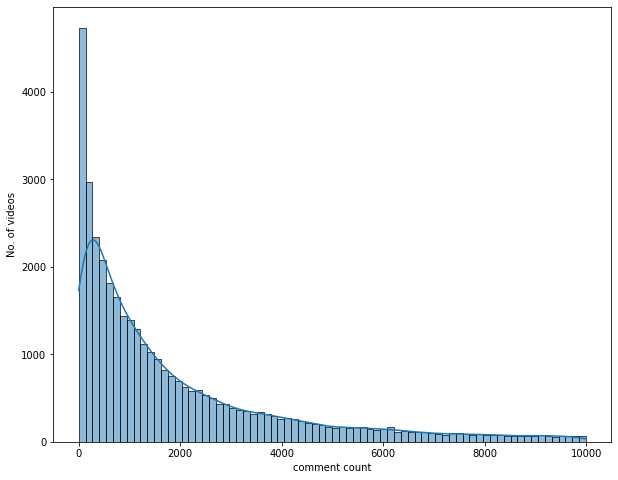

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
df_hist = df[df["comment_count"] < 10e3]
sns.histplot(data=df_hist, x='comment_count', kde=True)
ax.set(xlabel="comment count", ylabel="No. of videos")

interpretation of results: as we can see from the above plot the data in `comment_count` column is right skewed. skewness tells us about the direction of outliers. You can see that our distribution is positively skewed and most of the outliers are present on the right side of the distribution. Since our data is positively skewed here, it means that it has a higher number of data points having low values.




#### description of the duration attribute 

In [ ]:
df['durationday'] = df['duration'] / pd.Timedelta(days=1)
stats = ['mean', 'median', 'std']
agg_dict = {'durationday': stats}
desc_stats = df.agg(agg_dict)
desc_stats

,durationday
mean,2.891237
median,0.854144
std,59.737869


As we can see the average time it takes until a video become trending is approximately 3 days. However, the standard deviation is about 59 days, which indicates we have great spread in terms of the time it takes until a video become trending. 

In [ ]:

df_cleanduration = df.copy()
df_cleanduration[df_cleanduration['durationday'] < 0] = 1

we want to explore that for most of the videos how much time it takes until a video become trending. so we choose box plot for representing the distribution of data in column `duration`. Boxplots give a good graphical image of the concentration of the data. 

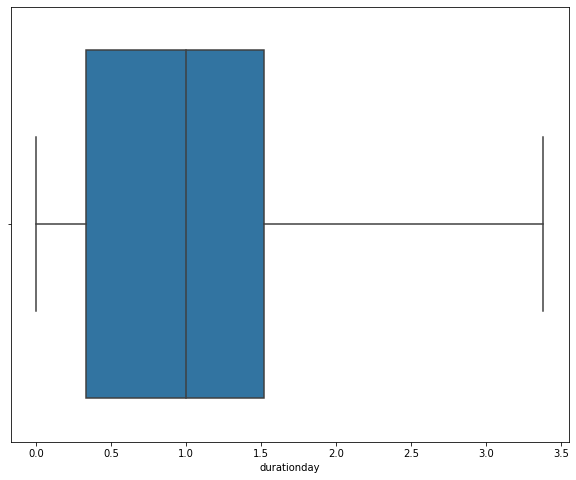

In [ ]:
fig2, ax2 = plt.subplots(figsize=(10,8))
sns.boxplot(x = 'durationday', data = df_cleanduration, ax=ax2,  showfliers=False, whis=[0,95])

Interpretation of results: in the boxplot function we set the whiskers between 0 and 0.95. in other words the whiskers shows the range between minimum `durationday` and 95% quantile of `durationday`. As we can see for 95 percent of the videos, it takes less than 3.5 days for a video to become trending. In addition, 50 percent of videos takes between less than half a day and 1.5 days to become trending(interquartile range). 

#### description of non-numerical columns

in the column *'category_id'* we have the code for categories. we extract the name of categories from json file.and create a new column *'category_name'* 

In [ ]:
import re
k = open('CA_category_id.json').read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories[43] ='unknown'
df['category_name'] = df['category_id'].map(categories)

let's explore the number of videos in each category. for showing the distribution of the number of videos in each category, we use bar plot. the reason we use bar plot is that bar plots are great choices for visualizing the distribution of categorical data variables. in this way, we can compare the number of data points in each category with the number of data points in other categories head to head. 

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'Category')]

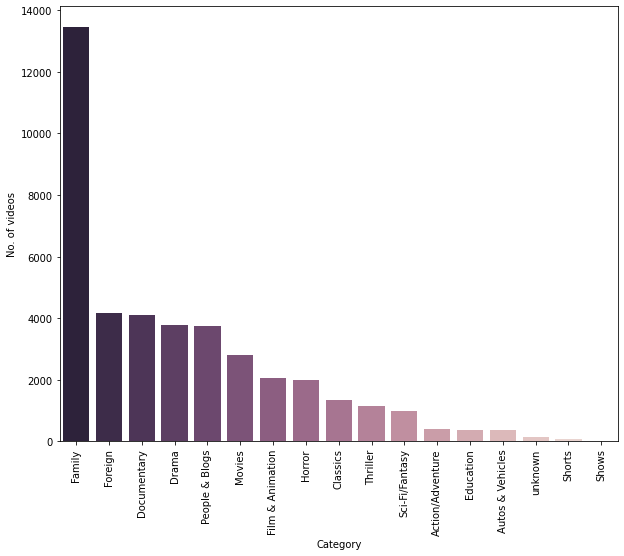

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of videos")

* as we can see from the above plot, the number of videos in `Family` category is much more that the number of videos in other categories. the other categories with highest number of videos(in order) are: `Foreign`, `Documentary`,`Drama`,`people &blog`. 
<br>
the categories with lowest number of videos are: `Action/Adventure`,`Education`, and `Autos & Vehicles`.  

In [ ]:
video_category = df.groupby('category_name')[['views','likes','dislikes','comment_count']].sum().reset_index()
video_category.sort_values(by='views',inplace=True, ascending= False)


let's plot the number of views,likes, number of dislikes, number of comment_counts, in each category. we use bar plots. 

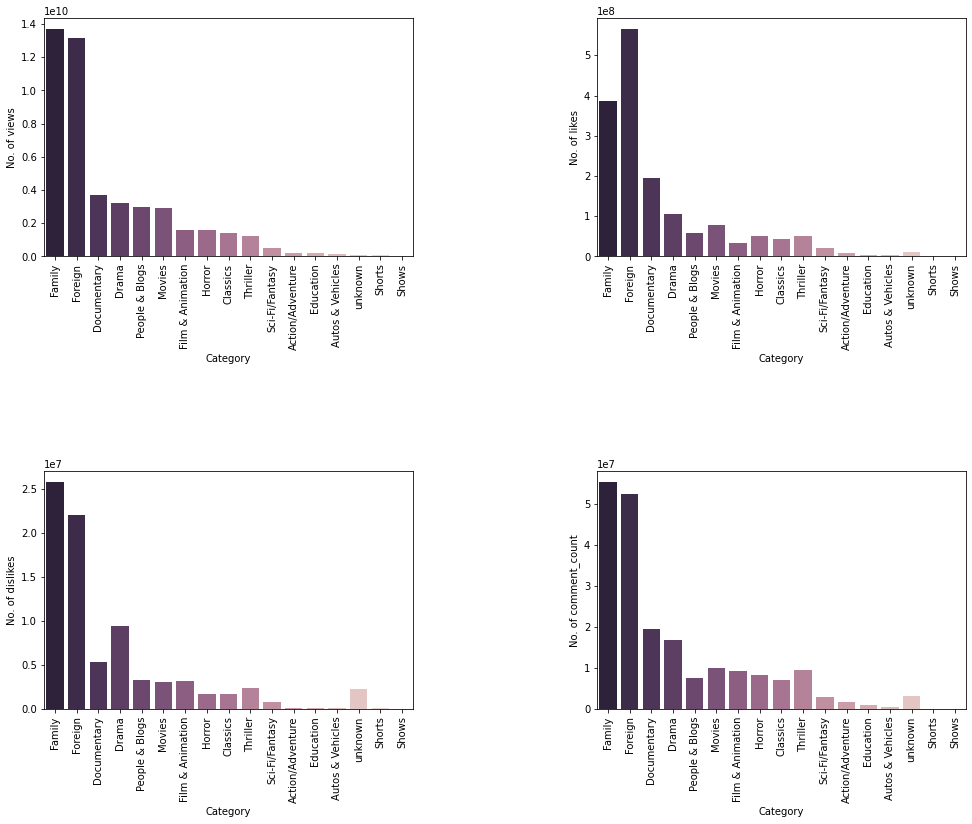

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(16, 12))
axs=axs.flatten() 
column_list = ['views','likes','dislikes','comment_count']
i = 0
for c in column_list:
     sns.barplot(x="category_name", y=c, data=video_category, palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=axs[i])
     axs[i].set_xticklabels(ax.get_xticklabels(), rotation=90)
     axs[i].set(xlabel="Category", ylabel="No. of " + c)
     i = i+1

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.9)

Three columns: `comments_disabled`, `ratings_disabled`, and `video_error_or_removed` contain boolean data. to represent the distribution of false and true values in these three columns we use pie charts. pie charts are great choices when it comes to showing percentages of a whole. 

Text(0.5, 1.0, 'the proportion of videos with and without errors or removed')

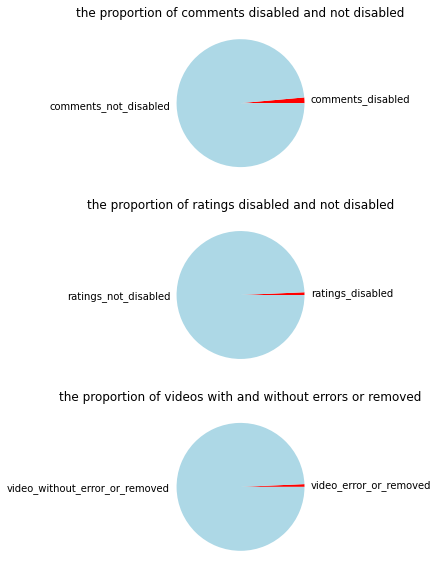

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax = ax.flatten()
comments_disabled = sum(df['comments_disabled'] == True)
comments_not_disabled = sum(df['comments_disabled'] == False)
data0 = [comments_disabled, comments_not_disabled]
labels0 = ['comments_disabled', 'comments_not_disabled']
my_colors = ['red','lightblue']
ax[0].pie(data0, labels=labels0, colors=my_colors)
ax[0].set_title('the proportion of comments disabled and not disabled')

ratings_disabled = sum(df['ratings_disabled'] == True)
ratings_not_disabled = sum(df['ratings_disabled'] == False)
data1 = [ratings_disabled, ratings_not_disabled]
labels1 = ['ratings_disabled', 'ratings_not_disabled']
ax[1].pie(data1, labels=labels1, colors=my_colors)
ax[1].set_title('the proportion of ratings disabled and not disabled')

video_error_or_removed = sum(df['video_error_or_removed'] == True)
video_without_error_or_removed = sum(df['video_error_or_removed'] == False)
data2 = [ratings_disabled, ratings_not_disabled]
labels2 = ['video_error_or_removed', 'video_without_error_or_removed']
ax[2].pie(data2, labels=labels2, colors=my_colors)
ax[2].set_title('the proportion of videos with and without errors or removed')

as we can see for only a tiny fraction of trending videos the comments and ratings are disabled, and only a tiny fraction of trending videos has error or removed.  

### check for missing values 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40881 non-null  object         
 1   trending_date           40881 non-null  datetime64[ns] 
 2   category_id             40881 non-null  int64          
 3   publish_time            40881 non-null  datetime64[ns] 
 4   views                   40881 non-null  int64          
 5   likes                   40881 non-null  int64          
 6   dislikes                40881 non-null  int64          
 7   comment_count           40881 non-null  int64          
 8   comments_disabled       40881 non-null  bool           
 9   ratings_disabled        40881 non-null  bool           
 10  video_error_or_removed  40881 non-null  bool           
 11  duration                40881 non-null  timedelta64[ns]
 12  durationday             40881 no

In [ ]:
CAvideos = df

* as we can see we do not have missing values in any columns(attributes), so we need to generate missing values

In [ ]:
# Make Missing values in Dataset
def missingGenerator(df, column_name, rate, inplace):
  dataset = df
  if not inplace:
    dataset = df.copy()
  should_be_missed = int(rate * dataset.shape[0])
  missing_rows = random.sample(range(0, dataset.shape[0]-1), should_be_missed)
  for row in missing_rows:
    dataset.loc[df.index[row], column_name] = np.NaN
  return dataset

In [ ]:
#generate missing values for columns 'likes' and 'category_id'
CAvideos = missingGenerator(df, 'likes', 0.2, False)
CAvideos = missingGenerator(CAvideos, 'category_id', 0.2, False)
CAvideos2 = CAvideos.copy()

In [ ]:
rows_to_fix_missing = CAvideos[CAvideos.isna().any(axis=1)].copy()

In [ ]:
CAvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40881 non-null  object         
 1   trending_date           40881 non-null  datetime64[ns] 
 2   category_id             32705 non-null  float64        
 3   publish_time            40881 non-null  datetime64[ns] 
 4   views                   40881 non-null  int64          
 5   likes                   32705 non-null  float64        
 6   dislikes                40881 non-null  int64          
 7   comment_count           40881 non-null  int64          
 8   comments_disabled       40881 non-null  bool           
 9   ratings_disabled        40881 non-null  bool           
 10  video_error_or_removed  40881 non-null  bool           
 11  duration                40881 non-null  timedelta64[ns]
 12  durationday             40881 no

As we can see missing values for two columns `category_id` and `likes` generated. 

### checking for outliers

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

let's find the outliers for each attribute. we use the quantile values for finding outliers. our approach for finding outliers is similar for all columns :`views`, `likes`, `dislikes`, `comment_counts`. first we check outliers in lower limit. we compute low_lim = 25% quantile(q1) - 1.5*(IQR), the amount for low_lim is negative for all the columns, and it indicates that we do not have outliers in lower limit. then we compute high_lim1 = q3 + 1.5*(IQR). in all columns we have data higher than high_lim1, so we have outliers in all columns, but we do not consider this limit as a thereshold for removing outliers, because in this way we have to remove a lot of data from our dataset. In addition our dataset contains data about trending videos, and having spread, to some extent, in the number of views, likes, dislikes, and 'comment_counts' is natural because of the nature of our dataset. so we decide to take 95% quantile as thereshold for removing outliers. In other words,in each column, we consider the values greater than 95% quantile as outliers.  

In [ ]:
col = 'views'
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
iqr = q3-q1
low_lim = q1 - 1.5*iqr
high_lim1 = q3 + 1.5*iqr
high_lim2 = df[col].quantile(0.95)

print('the low limit computed by formula:{}'.format(low_lim))
print('the high limit computed by formula:{}'.format(high_lim1))
print('the 95% quantile range is:{}'.format(high_lim2))

the low limit computed by formula:-1085198.0
the high limit computed by formula:2192402.0
the 95% quantile range is:4090835.0


In [ ]:
outlier_view = df[df['views'] > high_lim2]

'likes' attribute

In [ ]:
col = 'likes'
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
iqr = q3-q1
low_lim = q1 - 1.5*iqr
high_lim1 = q3 + 1.5*iqr
high_lim2 = df[col].quantile(0.95)

print('the low limit computed by formula:{}'.format(low_lim))
print('the high limit computed by formula:{}'.format(high_lim1))
print('the 95% quantile range is:{}'.format(high_lim2))

the low limit computed by formula:-37598.0
the high limit computed by formula:68506.0
the 95% quantile range is:165252.0


In [ ]:
outlier_like = df[df['likes'] > high_lim2]

'dislikes' attribute

In [ ]:
col = 'dislikes'
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
iqr = q3-q1
low_lim = q1 - 1.5*iqr
high_lim1 = q3 + 1.5*iqr
high_lim2 = df[col].quantile(0.95)

print('the low limit computed by formula:{}'.format(low_lim))
print('the high limit computed by formula:{}'.format(high_lim1))
print('the 95% quantile range is:{}'.format(high_lim2))

the low limit computed by formula:-1177.5
the high limit computed by formula:2226.5
the 95% quantile range is:6479.0


In [ ]:
outlier_dislike = df[df['dislikes'] > high_lim2]

'comment_count' attribute

In [ ]:
col = 'comment_count'
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
iqr = q3-q1
low_lim = q1 - 1.5*iqr
high_lim1 = q3 + 1.5*iqr
high_lim2 = df[col].quantile(0.95)

print('the low limit computed by formula:{}'.format(low_lim))
print('the high limit computed by formula:{}'.format(high_lim1))
print('the 95% quantile range is:{}'.format(high_lim2))

the low limit computed by formula:-4527.0
the high limit computed by formula:8657.0
the 95% quantile range is:19210.0


In [ ]:
outlier_commentcount = df[df['comment_count'] > high_lim2]

In [ ]:
rows_to_fix_outlier = pd.concat([outlier_view, outlier_like, outlier_dislike, outlier_commentcount ]).drop_duplicates()
index_to_remove = list(rows_to_fix_outlier.index)

In [ ]:
CAvideos_clean_outlier = CAvideos.drop(index=index_to_remove)

In [ ]:
CAvideos_clean_final = CAvideos_clean_outlier.dropna()
CAvideos_clean_final

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,duration,durationday,category_name
1,0dBIkQ4Mz1M,2017-11-14,23.00,2017-11-13 17:00:00,1014651,127794.00,1688,13030,False,False,False,0 days 07:00:00,0.29,Drama
3,d380meD0W0M,2017-11-14,24.00,2017-11-12 18:01:41,2095828,132239.00,1989,17518,False,False,False,1 days 05:58:19,1.25,Family
7,2kyS6SvSYSE,2017-11-14,22.00,2017-11-13 17:13:01,748374,57534.00,2967,15959,False,False,False,0 days 06:46:59,0.28,Documentary
9,43sm-QwLcx4,2017-11-14,22.00,2017-11-10 14:10:46,505161,4135.00,976,1484,False,False,False,3 days 09:49:14,3.41,Documentary
14,LUzsOyWp9lw,2017-11-14,24.00,2017-11-12 22:00:01,960747,31810.00,668,5335,False,False,False,1 days 01:59:59,1.08,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,24.00,2018-06-13 18:00:07,80685,1701.00,99,1312,False,False,False,0 days 05:59:53,0.25,Family
40877,8HNuRNi8t70,2018-06-14,24.00,2018-06-13 19:01:18,103339,460.00,66,51,False,False,False,0 days 04:58:42,0.21,Family
40878,GWlKEM3m2EE,2018-06-14,20.00,2018-06-11 17:30:53,773347,25900.00,224,3881,False,False,False,2 days 06:29:07,2.27,Classics
40879,lbMKLzQ4cNQ,2018-06-14,25.00,2018-06-13 04:00:05,115225,2115.00,182,1672,False,False,False,0 days 19:59:55,0.83,Foreign


removing rows with missing values

# Task 2

In [ ]:
import itertools
import enum
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, Normalizer, FunctionTransformer

columns = ['views', 'likes', 'dislikes', 'comment_count', 'durationday']
scaler_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile', 'Log']
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]

In [ ]:
def scalerPlotter(df, col):
    # Making subplots
    fig, axs = plt.subplots(1, 6, figsize=(49,6), constrained_layout=True)
    axs = axs.flatten()

    df_temp = df[col].values.reshape(-1,1)

    # Plotting raw data
    sns.histplot(data=df, x=col, ax=axs[0], bins=40)
    axs[0].set_title('Raw', fontsize=30)
    axs[0].set_ylabel('Density', fontsize=25)

    # Plotting transformed data
    for idx, scaler in enumerate(scalers):
        df_transformed = scaler.fit_transform(df_temp)
        df_transformed = pd.DataFrame(df_transformed, columns=[col])
        sns.histplot(data=df_transformed, ax=axs[idx+1], bins=60)
        axs[idx+1].set_title(scaler_names[idx], fontsize=25)
        axs[idx+1].set_xlabel('', fontsize=16)
        axs[idx+1].set_ylabel('', fontsize=16)
        axs[idx+1].get_legend().remove()
    
    fig.suptitle(col, fontsize=40)
    plt.show()

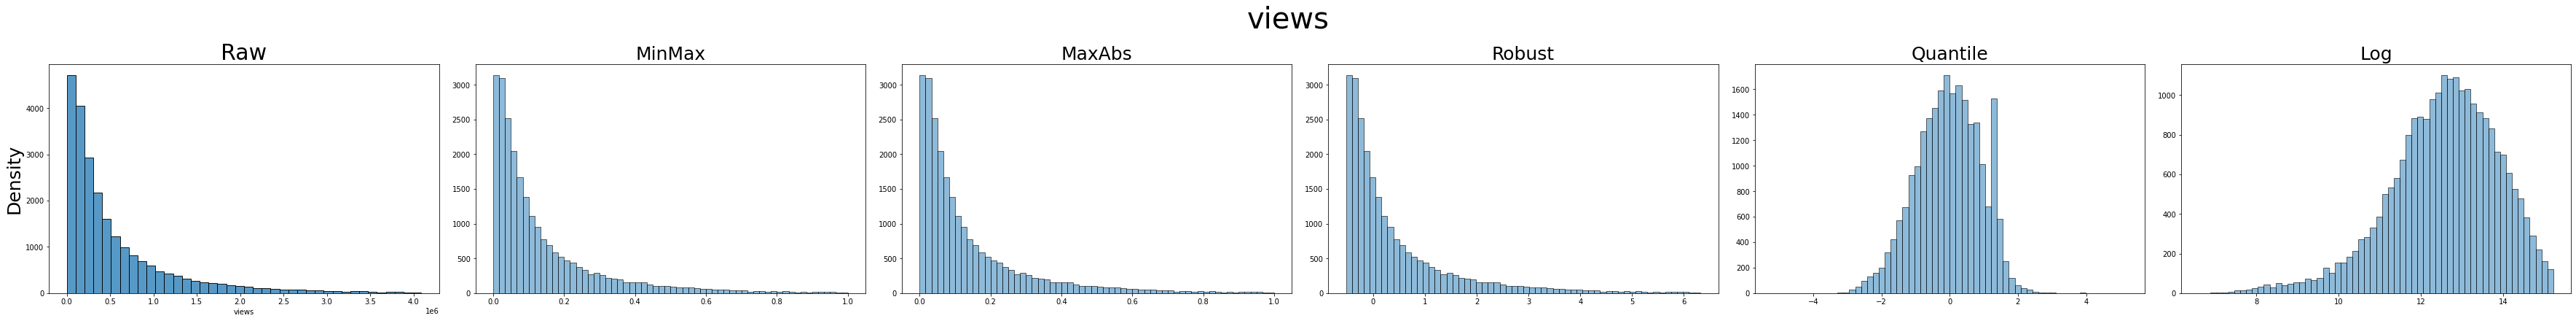

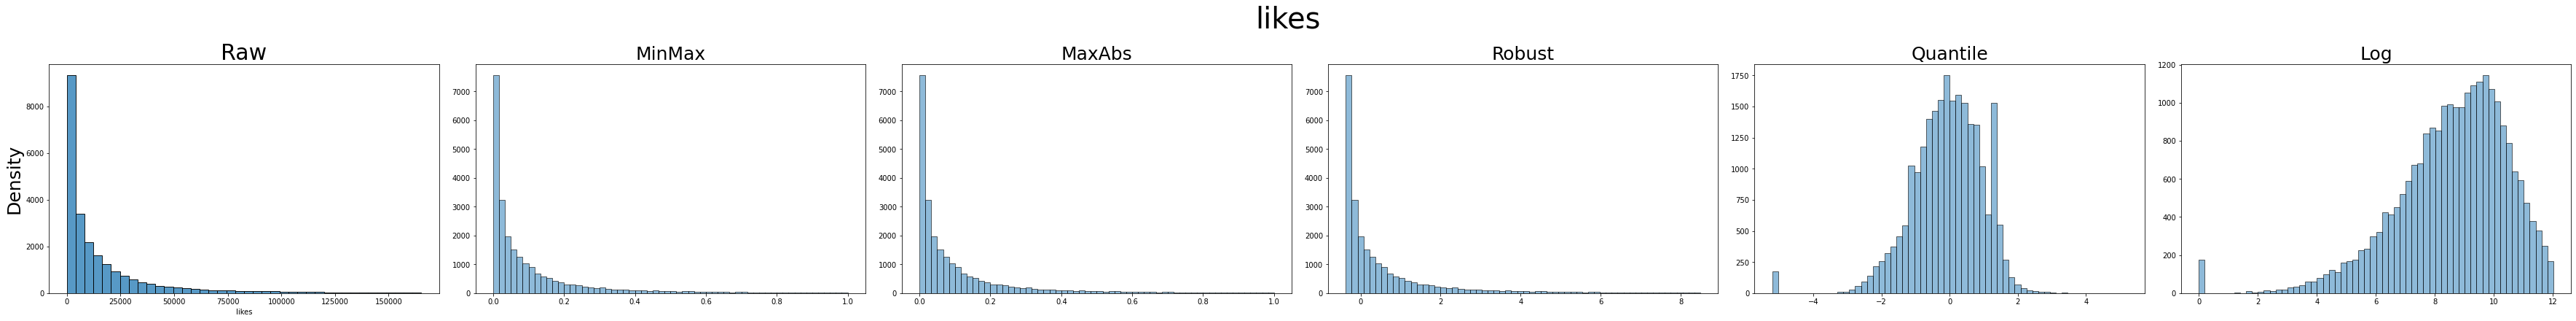

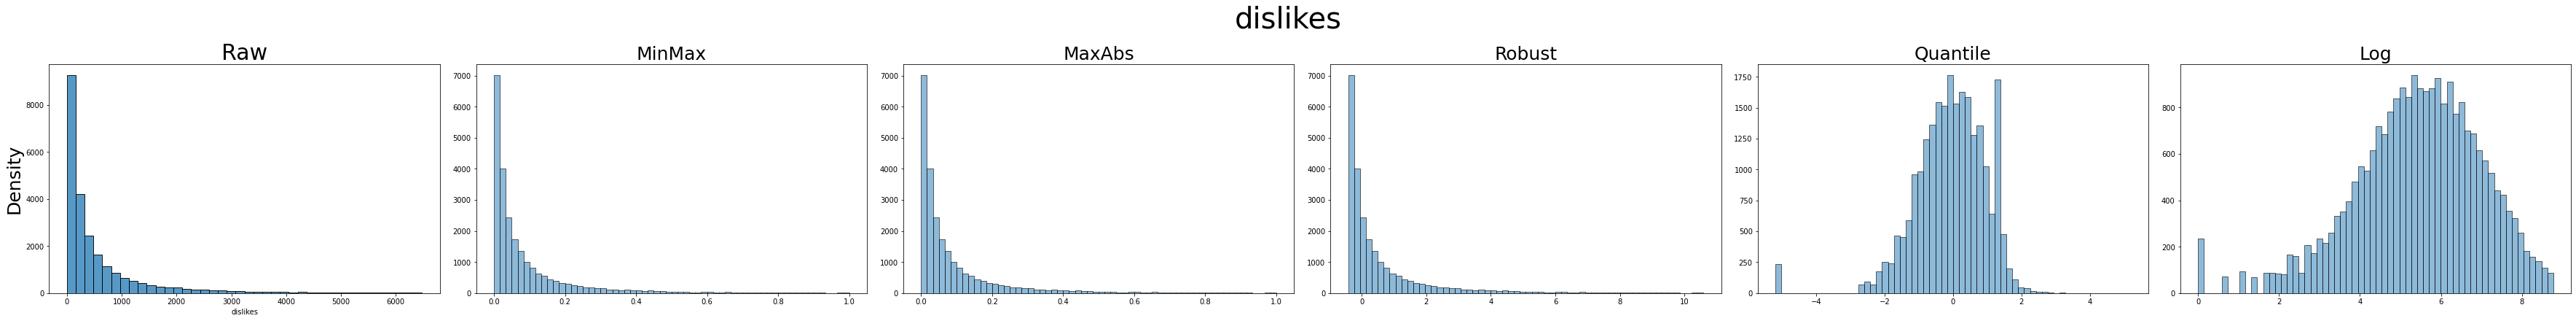

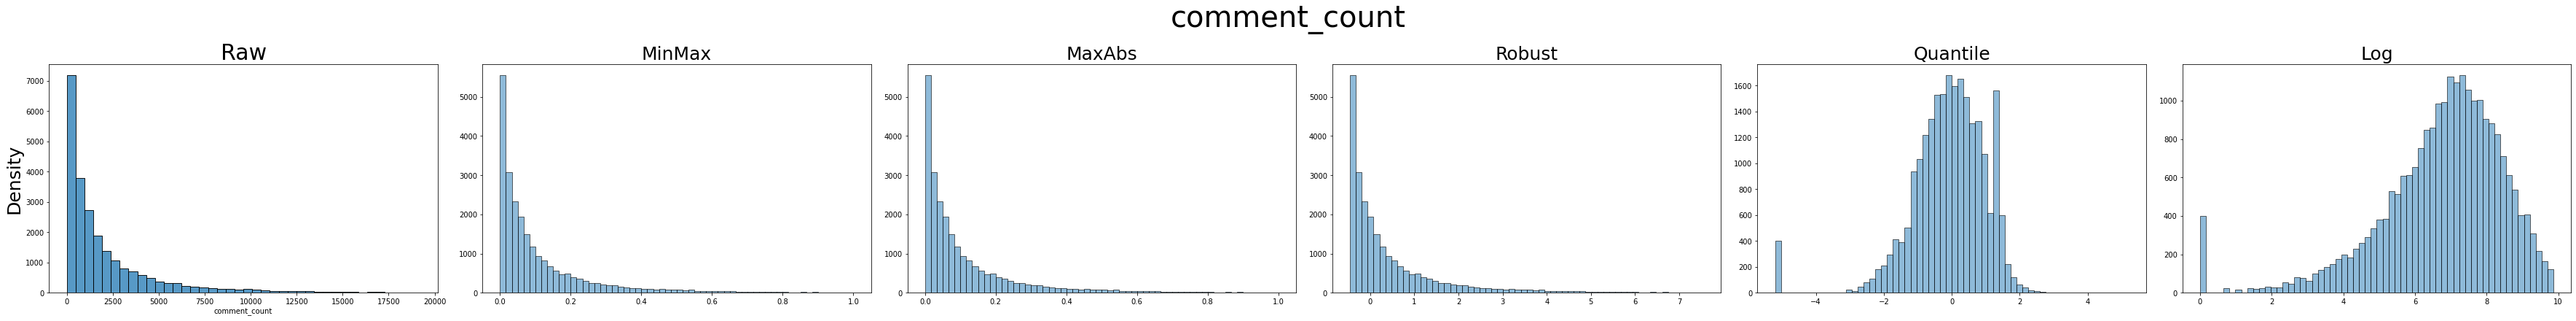

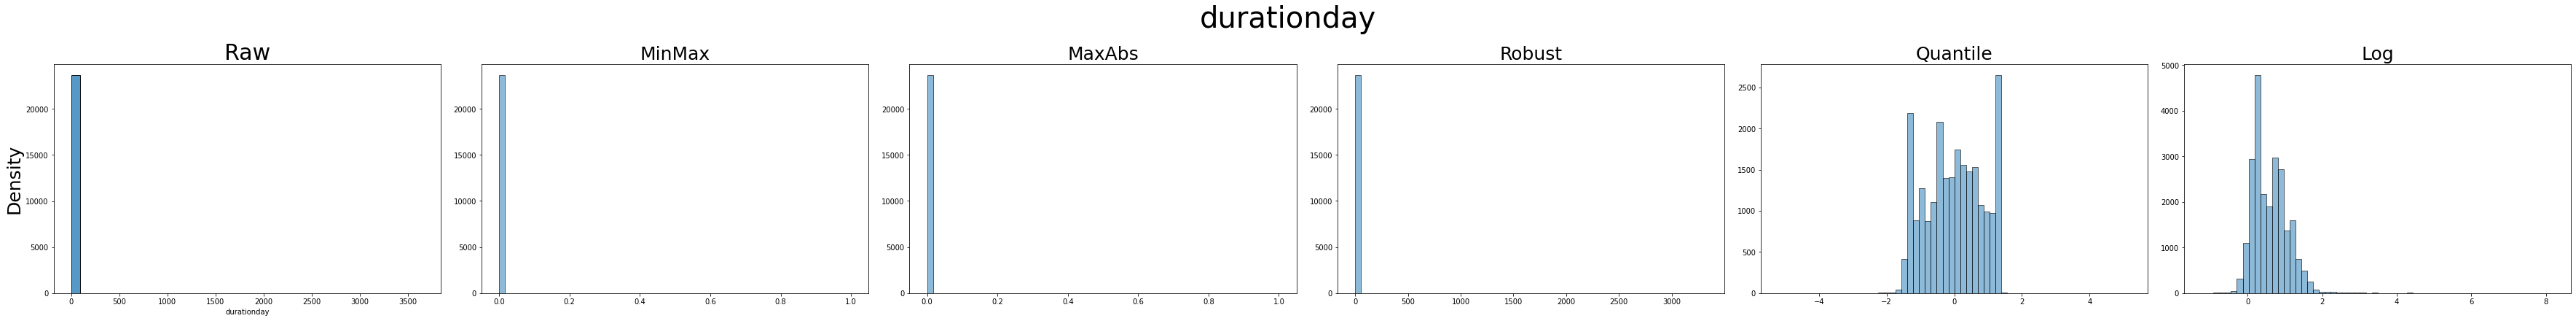

In [ ]:
for c in columns:
    scalerPlotter(CAvideos_clean_final, c)

`MinMax` scaler doesn't change the data distribution and shifts the columns to be ranging from 0 to 1. This way, many models might behave better than using the raw data.<br> 
Regarding the `MaxAbs` scaler, again, because we don't have negative values in our data, its result is very similar to the MinMax scaler (without any change in data distribution).<br> 
The `Robust` scaler doesn't change the distribution either. However, compared to MinMax and MaxAbs, it increases the spread of the data.<br> 
`Quantile` transformer, on the other hand, changes the distribution (we forced our distribution to be normal). That is why data became bell-shaped from skewed. We could use the uniform distribution, too, which significantly increases the spread.<br>
`Log` transform also changes the distribution and reduces the range.<br>

What to use for our data:<br> 
As you observe in the plot above, our data is very (1)skewed. Also, we will see that data contains many (2)outliers. Therefore, the MixMax scaler and the MaxAbs scaler may not be good choices. However, there is no golden rule or a fit-to-all transformer, so we have to assess them and observe which one performs better with our model and our data.<br> 
In the next task, we will investigate the best combination for each column in our data and choose the best one for employing.



#Task 3

##Part 1

First, we define a method for plotting missing values along with original and primary data.<br>


*   Primary  = Data without missing values
*   Original = Data with artificial missing values
*   Modified = Using methods for filling missing values in Original data



In [ ]:
def plotMissing(df_primary, df_missed, column, based_on, first_n_rows):
    m_sorted = df_missed.sort_values(by=based_on)
    original = m_sorted.head(first_n_rows)
    original_indexes = original.index.values
    primary = df_primary[df_primary.index.isin(original_indexes)]

    original = original.sort_values(by=[based_on,'video_id']).reset_index(drop=True)
    primary = primary.sort_values(by=[based_on,'video_id']).reset_index(drop=True)

    fig, axs = plt.subplots(6,1,figsize=(25,15), constrained_layout=True)
    axs = axs.flatten()
    fig.suptitle(f'Filling missing values of {column} column', fontsize=15)

    # Drop
    modified = original.dropna()
    modified[column].plot(ax=axs[0], color='red', lw=4, label='Modified')
    original[column].plot(ax=axs[0], color='black', label='Original')
    primary[column].plot(ax=axs[0], color='green', label='Primary', linestyle = 'dotted')
    axs[0].set(title='Dropping', ylabel=column)
    axs[0].legend()

    # Backward Fill
    modified = original.fillna(method='bfill')
    modified[column].plot(ax=axs[1], color='red', lw=4, label='Modified')
    original[column].plot(ax=axs[1], color='black', label='Original')
    primary[column].plot(ax=axs[1], color='green', label='Primary', linestyle = 'dotted')
    axs[1].set(title='Backward fill', ylabel=column)
    axs[1].legend()

    # Forward Fill
    modified = original.fillna(method='ffill')
    modified[column].plot(ax=axs[2], color='red', lw=4, label='Modified')
    original[column].plot(ax=axs[2], color='black', label='Original')
    primary[column].plot(ax=axs[2], color='green', label='Primary', linestyle = 'dotted')
    axs[2].set(title='Forward fill', ylabel=column)
    axs[2].legend()

    # Mean (filling using mean)
    modified = original.copy()
    mean = original[column].mean()
    modified[column].fillna(mean, inplace=True)
    modified[column].plot(ax=axs[3], color='red', lw=4, label='Modified')
    original[column].plot(ax=axs[3], color='black', label='Original')
    primary[column].plot(ax=axs[3], color='green', label='Primary', linestyle = 'dotted')
    axs[3].set(title='Mean filling', ylabel=column)
    axs[3].legend()

    # Mode (filling using mean)
    modified = original.copy()
    mode=original[column].mode()[0]
    modified[column].fillna(mode, inplace=True)
    modified[column].plot(ax=axs[4], color='red', lw=4, label='Modified')
    original[column].plot(ax=axs[4], color='black', label='Original')
    primary[column].plot(ax=axs[4], color='green', label='Primary', linestyle = 'dotted')
    axs[4].set(title='Mode filling', ylabel=column)
    axs[4].legend()

    # Median (filling using mean)
    modified = original.copy()
    median = original[column].median()
    modified[column].fillna(median, inplace=True)
    modified[column].plot(ax=axs[5], color='red', lw=4, label='Modified')
    original[column].plot(ax=axs[5], color='black', label='Original')
    primary[column].plot(ax=axs[5], color='green', label='Primary', linestyle = 'dotted')
    axs[5].set(title='Median filling', ylabel=column)
    axs[5].legend()


*   Our dataset is not a time series dataset, and rows are independent of each other without any time dependency on each other. Thus, using `forward fill` and `backward fill` is not good at all.
*   `Dropping` missing values is another poor choice because this way, we lose much important information in our data.
*   As we observed in the previous task, our data is very skewed. Thus, using the `mean` for filling missing values is not a good idea and using the `median` or `mode` is a better idea.
*   Here, the best strategy for imputation is to use a trained `model`, which we will build and discuss in detail soon.

We plot the data using a line plot for the sake of better illustration of different imputation methods' effects. However, as mentioned, our data is not a time series.

Different methods of filling `likes` column missing values:

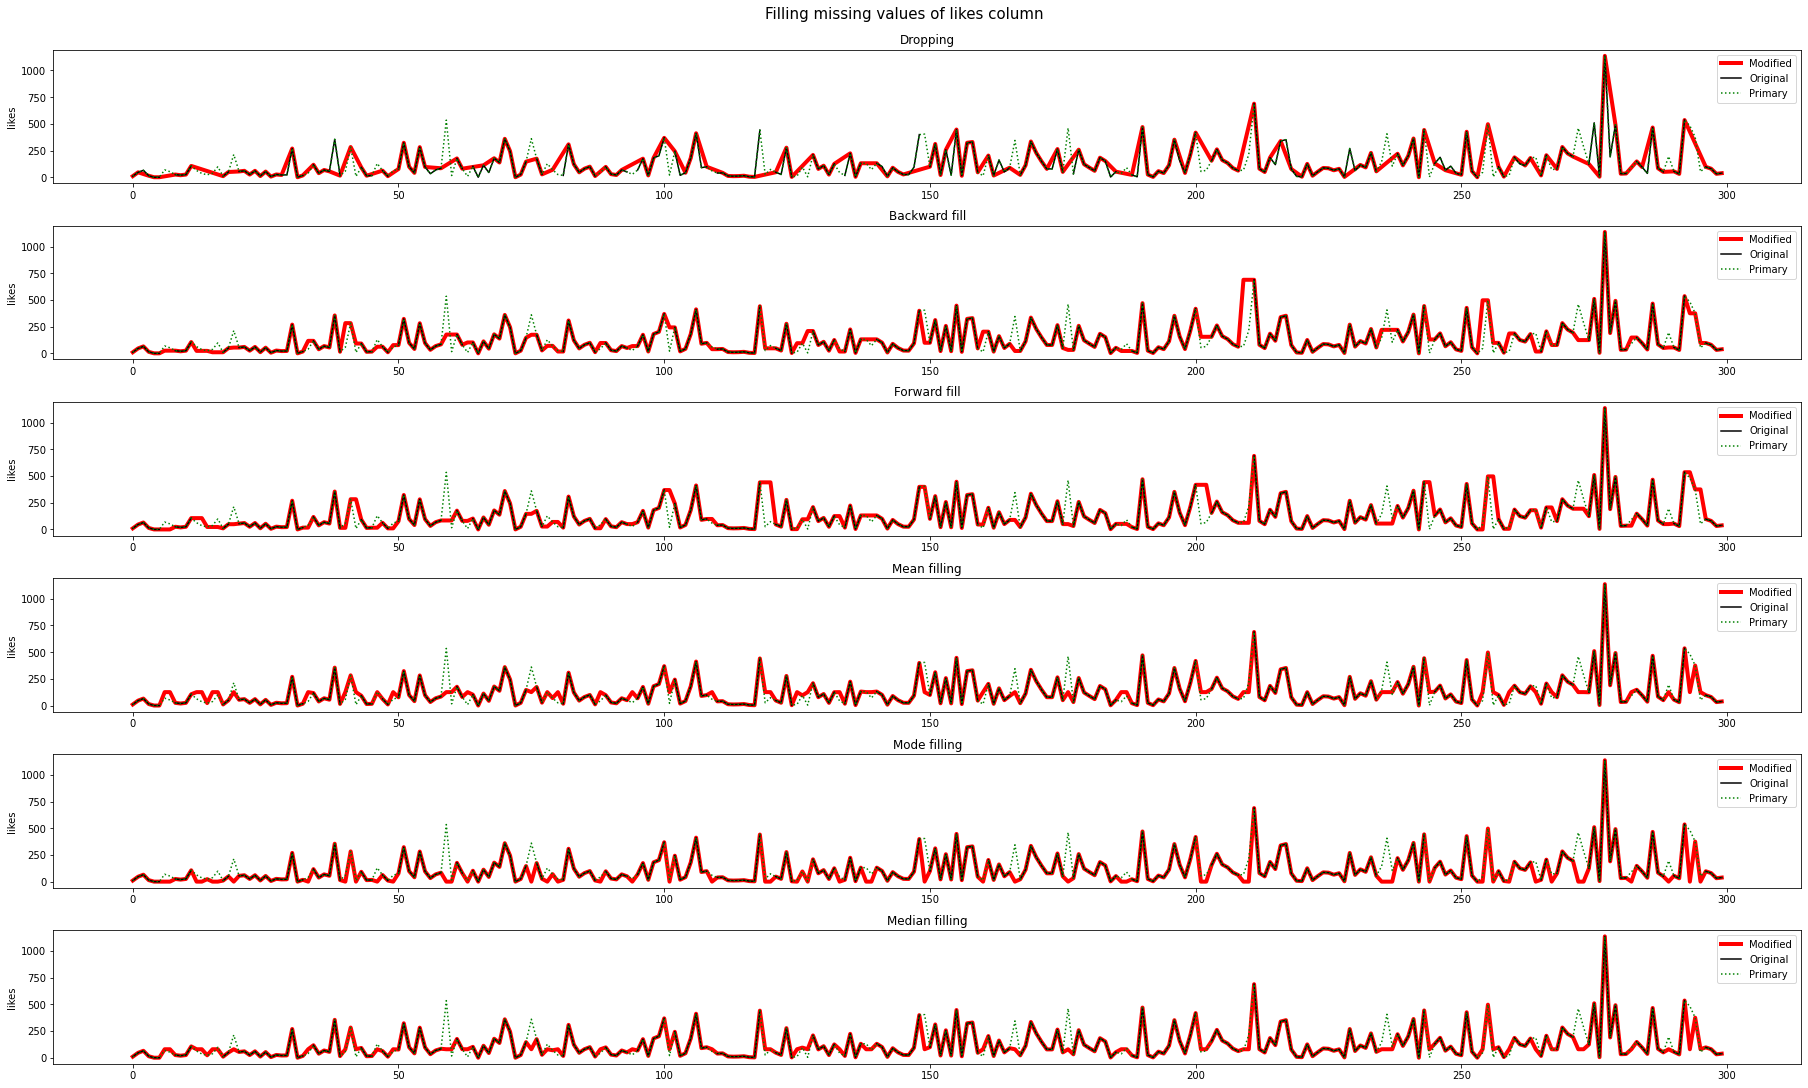

In [ ]:
plotMissing(df, CAvideos, 'likes', 'views', 300)

Based on the Task 1, we observed that `likes` column is skewed. So, filling missing values using `median` might be a good option. another option for filling missing values in the `likes` column is using `regressor` that we explore in the next part.

In [ ]:
CAvideos_fill_missing = CAvideos.copy()
median = CAvideos.dropna()['likes'].median()
CAvideos_fill_missing['likes'].fillna(median,inplace=True)

Regarding the `categoty_id` column, the best choice is using mode. Another option for filling missing values in the `categoty_id` is using `classifier` that we will explore in the next part.

In [ ]:
mode = CAvideos['category_id'].mode()[0]
CAvideos_fill_missing['category_id'].fillna(mode, inplace=True)
CAvideos_fill_missing['category_name'] = CAvideos_fill_missing['category_id'].map(categories)

In [ ]:
CAvideos_fill_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40881 non-null  object         
 1   trending_date           40881 non-null  datetime64[ns] 
 2   category_id             40881 non-null  float64        
 3   publish_time            40881 non-null  datetime64[ns] 
 4   views                   40881 non-null  int64          
 5   likes                   40881 non-null  float64        
 6   dislikes                40881 non-null  int64          
 7   comment_count           40881 non-null  int64          
 8   comments_disabled       40881 non-null  bool           
 9   ratings_disabled        40881 non-null  bool           
 10  video_error_or_removed  40881 non-null  bool           
 11  duration                40881 non-null  timedelta64[ns]
 12  durationday             40881 no

One option for filling outliers is using `InterQuartile Range (IQR)`. we show it as an example for `likes` column. Another option is using `Regressor` that we explore in next part.

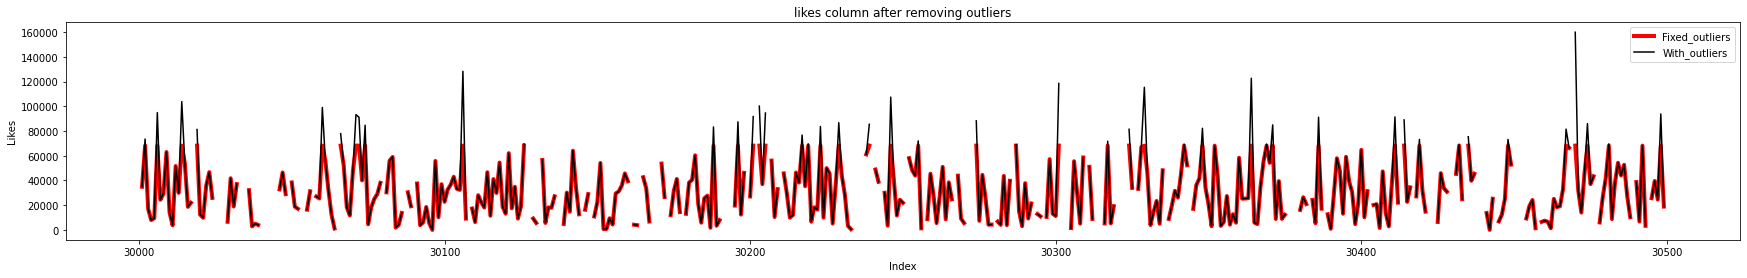

In [ ]:
# Define a method to remove outliers of column 'column' in 'df' dataset
def outlier_IQR_fill(df, column):
    df_t = df.copy() 
    q1=df_t[column].quantile(0.25)
    q3=df_t[column].quantile(0.75)
    iqr = q3-q1
    low_lim = q1 - 1.5*iqr
    high_lim = q3 + 1.5*iqr 
    df_t[column] = np.where(df_t[column] >= high_lim, high_lim, np.where(df_t[column] <= low_lim, low_lim, df_t[column]))
    return df_t

# Plotting a part of 'likes' column with outliers and with replaced outliers
filled_temp = outlier_IQR_fill(CAvideos, 'likes')
filled_temp = filled_temp.sort_values(['views', 'video_id']).reset_index(drop=True)
CAvideos_temp = CAvideos.sort_values(['views', 'video_id']).reset_index(drop=True)

filled_temp = filled_temp.iloc[30000: 30500]
CAvideos_temp = CAvideos_temp.iloc[30000: 30500]

fig, ax = plt.subplots(figsize =(30, 4))
filled_temp['likes'].plot(ax=ax, color='red', lw=4, label='Fixed_outliers')
CAvideos_temp['likes'].plot(ax=ax, color='black', label='With_outliers')
ax.set(title='likes column after removing outliers', xlabel='Index', ylabel='Likes')
ax.legend()
plt.show()

##Part 2

let's fill the missing values and outliers for the `likes` column. First we evaluate different combinations of `Regressor` and `data scaling` techniques with `repeated cross validation` to see which one is the best choice for filling missing values and outliers. 
<br><br>
Due to the regression nature of the problem (prediction of likes), we have two evaluation metrics to choose from: Mean Squared Error and Root Mean Squared Error (Deviation). MSE, however, squares the difference and changes the unit. It is, therefore, better to use RMSD.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
def scalerModelComparator(my_df, colu):
    # Removing unnecessary columns
    X = my_df
    cols = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'durationday']
    cols.remove(colu)
    y = X[[colu]]
    X = X[cols]

    y = y.to_numpy()

    # Encoding columns
    le = LabelEncoder() 
    X['comments_disabled'] = le.fit_transform(X['comments_disabled'])
    X['ratings_disabled'] = le.fit_transform(X['ratings_disabled'])
    X['video_error_or_removed'] = le.fit_transform(X['video_error_or_removed'])

    # Defining Scaler Names for Plotting
    scaler_names = ['Raw data', 'MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']

    # Defining Scalers
    arr_scalers = [-1, MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(random_state=seed)]

    # Defining Models
    models = [KNeighborsRegressor(n_neighbors=3), LinearRegression()]

    # This List Contains Final Results for Plotting
    results = [{}, {}]

    for j in range(len(models)):
      for i in range (len(arr_scalers)):
      
        # Performing Scaling
        if(i!=0):
          X_new = arr_scalers[i].fit_transform(X)
        else:
          X_new = X

        # Performing Cross-Validation using Selected Model
        model = models[j]
        cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=seed)
        scores = cross_val_score(model, X_new, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

        # Adding Results to the Result List for Plotting
        if(j==0):
          results[j][f'KNN-{scaler_names[i]}'] = [abs(elem) for elem in scores]
        else:
          results[j][f'Linear-{scaler_names[i]}'] = [abs(elem) for elem in scores]

    # Merging two dictionaries into one (results[0]) for plotting
    results[0].update(results[1])

    # Creating a DataFrame from results[0] dictionary 
    df_res = pd.DataFrame(results[0])

    return df_res

In [ ]:
def plotScalerModelComparator(df_r, coo):
    fig, ax = plt.subplots(figsize =(24, 10))
    out = df_r.boxplot(rot=45)
    ax.set(title=f'Comparing performance of Model-Scaler Combinations for predicting {coo} column', ylabel='RMSD')
    plt.show()

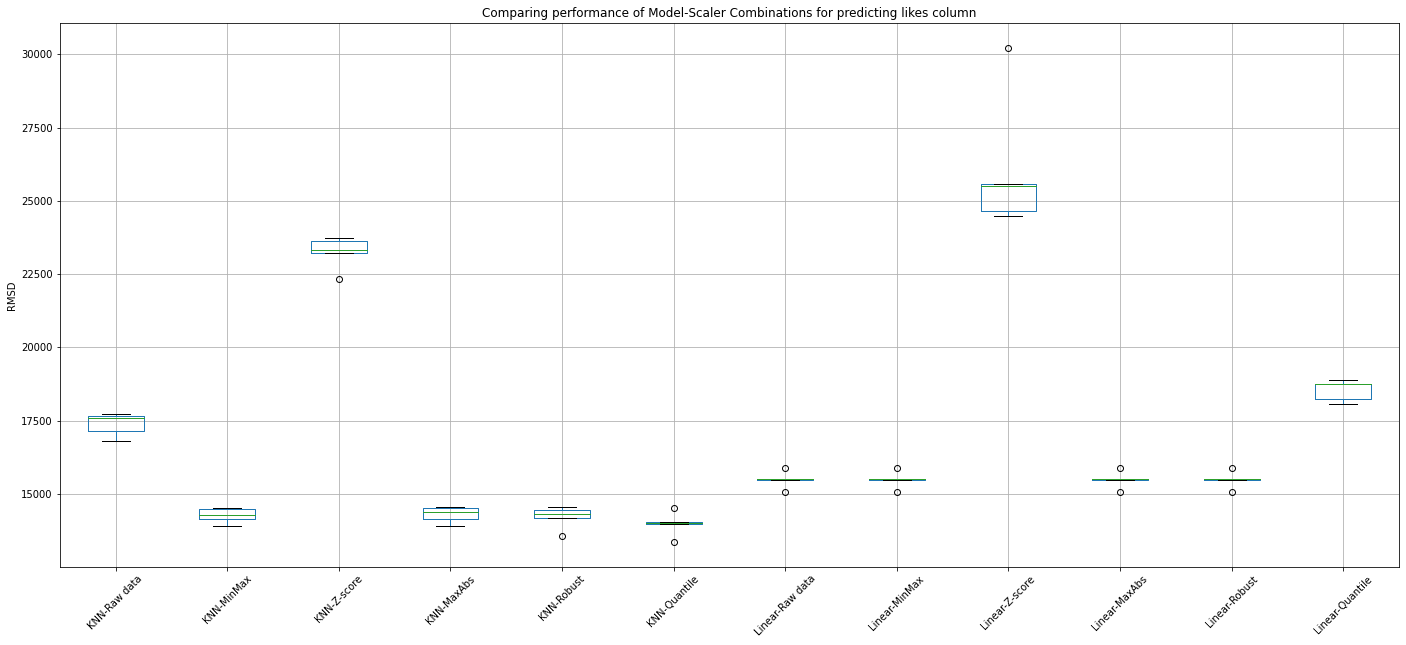

In [ ]:
df_res = scalerModelComparator(CAvideos_clean_final, 'likes')
plotScalerModelComparator(df_res, 'likes')

As we can see in the above plot, the best choice for the combination of Regressor + data scaling technique is `KNN-Quantile`. Because its median is the lowest, the range between its maximum and minimum is not much and also it didn't produce many outliers. So we apply this combination to fill the missing values and outliers in the column `likes`.

Now, we perform the same procedure for `dislike`, `view` and `comment_count` column:


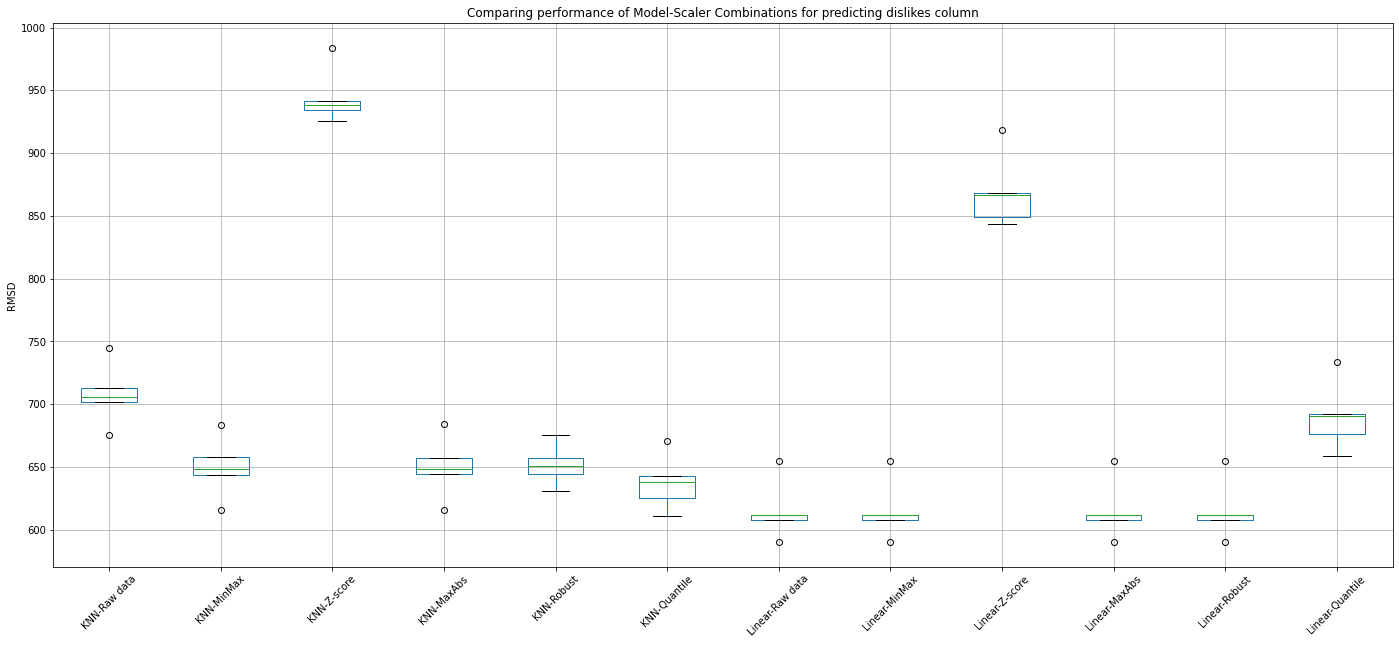

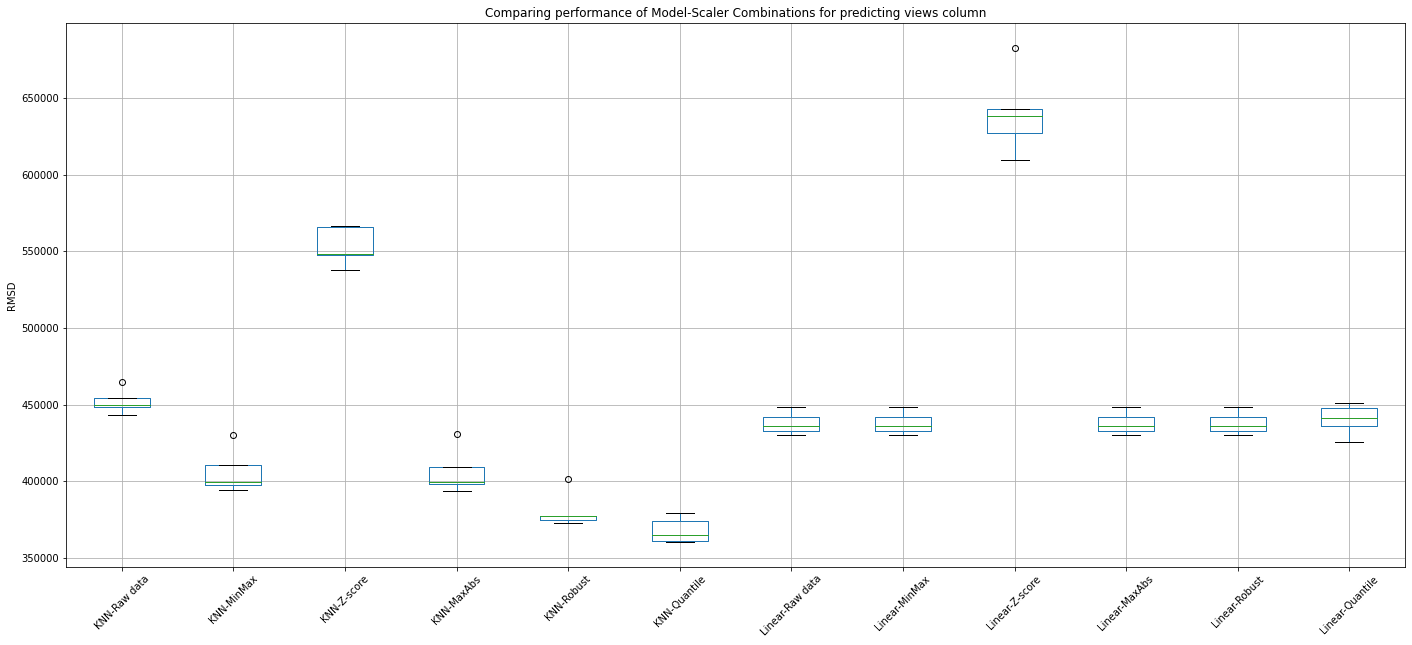

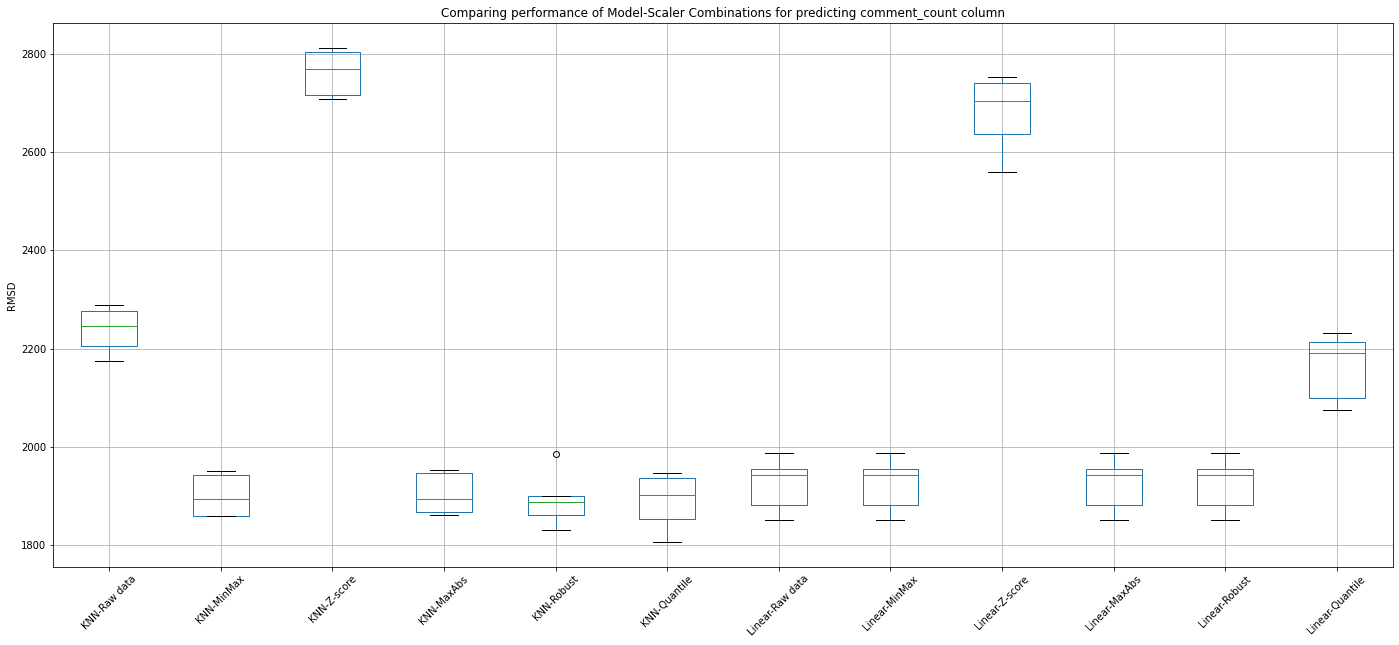

In [ ]:
df_res_dislike = scalerModelComparator(CAvideos_clean_final, 'dislikes')
df_res_views = scalerModelComparator(CAvideos_clean_final, 'views')
df_res_comments = scalerModelComparator(CAvideos_clean_final, 'comment_count')

plotScalerModelComparator(df_res_dislike, 'dislikes')
plotScalerModelComparator(df_res_views, 'views')
plotScalerModelComparator(df_res_comments, 'comment_count')

Regarding `dislike` column, the best combination is Linear-MinMax (or Linear-Raw).<br>
About the `views` and the `comment_count` columns best cominations are both `KNN-Quantile`. 

Now, lets fill outliers in our dataset using IQR and then train different models for filling missing values and outliers for different columns (based on our prevoius combinations):

In [ ]:
columns = ['views', 'likes', 'dislikes', 'comment_count', 'durationday']
CAvideos_filled_outliers_IQR = CAvideos.copy()
for c in columns:
    outlier_IQR_fill(CAvideos_filled_outliers_IQR, c)

We define a method that which fills missing values of dataframe:


*   df_to_train -> the dataset used to train the model
*   df_to_fill -> the dataset which is filled with the trained model
*   column -> the column to fill
*   scaler -> the scaler used for the data
*   model -> the model used for training



In [ ]:
def fillWithModel(df_to_train, column, scaler, model, df_to_fill):
    # Defining which rows should be fixed
    rows_to_fix = df_to_fill[df_to_fill.isna().any(axis=1)].copy()

    # Cleaning training dataset
    df_dropped = df_to_train.dropna()

    # Removing unnecessary columns and encoding some of them
    df_dropped = df_dropped[['category_id', 'likes', 'views', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'durationday']]
    le = LabelEncoder() 
    df_dropped['comments_disabled'] = le.fit_transform(df_dropped['comments_disabled'])
    df_dropped['ratings_disabled'] = le.fit_transform(df_dropped['ratings_disabled'])
    df_dropped['video_error_or_removed'] = le.fit_transform(df_dropped['video_error_or_removed'])

    # Removing y column
    y = df_dropped[[column]]
    df_dropped = df_dropped.drop(column, axis=1)

    # Transforming data
    scaler_m = scaler
    X_new = scaler_m.fit_transform(df_dropped)

    # Creating and Fitting the model
    model = model
    model.fit(X_new, y)

    # Reading rows with missing like
    missed_likes_1 = rows_to_fix[rows_to_fix[column].isna()]

    # Filtering column for fitting the model
    filtered_cols = ['category_id', 'likes', 'views', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'durationday']
    filtered_cols.remove(column)  
    missed_likes_2 = missed_likes_1[filtered_cols]

    # Filling category_id NaNs with mode
    mode = df_dropped['category_id'].mode()[0]
    missed_likes_2['category_id'].fillna(mode, inplace=True)

    # Encoding columns
    le = LabelEncoder() 
    missed_likes_2['comments_disabled'] = le.fit_transform(missed_likes_2['comments_disabled'])
    missed_likes_2['ratings_disabled'] = le.fit_transform(missed_likes_2['ratings_disabled'])
    missed_likes_2['video_error_or_removed'] = le.fit_transform(missed_likes_2['video_error_or_removed'])

    # Scaling data
    missed_likes_2 = scaler.transform(missed_likes_2)

    # Predicting
    y_pred = model.predict(missed_likes_2)

    # Filling missing rows (likes) with prediction values
    missed_likes_1[column] = y_pred
    missed_likes_1[column] = missed_likes_1[column].astype(int)

    # Create a new dataframe with filled likes
    CAvideos_clean_liked_filled = df_to_fill.copy()

    CAvideos_clean_liked_filled[column] = CAvideos_clean_liked_filled[column].fillna(missed_likes_1[column])
    return CAvideos_clean_liked_filled

We are going to train 2 different models for filling `likes` column missing values and compare their results:

1.   Using dropped missing values and dropped outlier values
2.   Using dropped missing values and filled outlier values (with IQR)

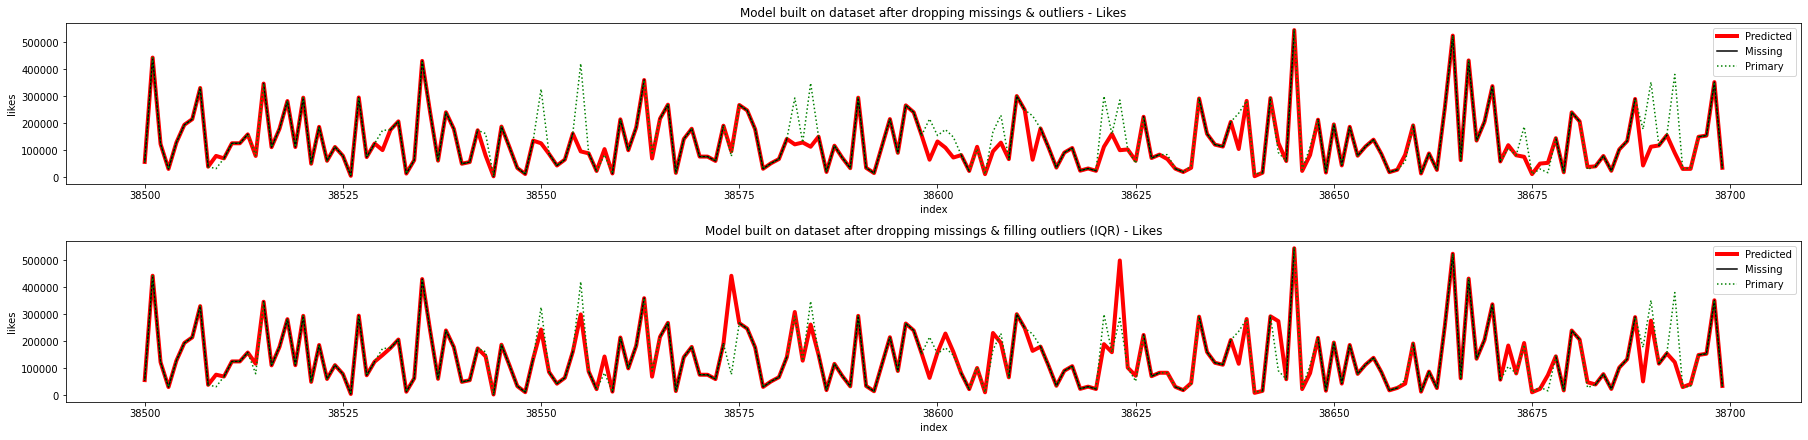

In [ ]:
# Making Dataframes
dropped_om = fillWithModel(CAvideos_clean_final, 'likes', QuantileTransformer(random_state=seed), KNeighborsRegressor(n_neighbors=3), CAvideos)
dropped_m_filled_o = fillWithModel(CAvideos_filled_outliers_IQR, 'likes', QuantileTransformer(random_state=seed), KNeighborsRegressor(n_neighbors=3), CAvideos)


# Plotting results
fig, axs = plt.subplots(2, 1, figsize=(25,6), constrained_layout=True)
axs = axs.flatten()

primary = df.sort_values(['views', 'video_id']).reset_index(drop=True)
original = CAvideos.sort_values(['views', 'video_id']).reset_index(drop=True)
modified_mo = dropped_om.sort_values(['views', 'video_id']).reset_index(drop=True)
modified_m = dropped_m_filled_o.sort_values(['views', 'video_id']).reset_index(drop=True)

primary = primary.iloc[38500:38700]
original = original.iloc[38500:38700]
modified_mo = modified_mo.iloc[38500:38700]
modified_m = modified_m.iloc[38500:38700]

modified_mo['likes'].plot(ax=axs[0], color='red', lw=4, label='Predicted')
original['likes'].plot(ax=axs[0], color='black', label='Missing')
primary['likes'].plot(ax=axs[0], color='green', label='Primary', linestyle='dotted')
axs[0].set(title='Model built on dataset after dropping missings & outliers - Likes', ylabel="likes", xlabel='index')
axs[0].legend()

modified_m['likes'].plot(ax=axs[1], color='red', lw=4, label='Predicted')
original['likes'].plot(ax=axs[1], color='black', label='Missing')
primary['likes'].plot(ax=axs[1], color='green', label='Primary', linestyle='dotted')
axs[1].set(title='Model built on dataset after dropping missings & filling outliers (IQR) - Likes', ylabel="likes", xlabel='index')
axs[1].legend()

plt.show()

A part of the results are shown in the plot above which doesn't represent the overall performance. So, in order to find out which one performed better, we use RMSE:

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = primary['likes'].values

y_pred_df1 = modified_mo['likes'].values
y_pred_df2 = modified_m['likes'].values

RMSE_df_1 = mean_squared_error(y_true = y_true, y_pred = y_pred_df1, squared=False)
RMSE_df_2 = mean_squared_error(y_true = y_true, y_pred = y_pred_df2, squared=False)

print(RMSE_df_1)
print(RMSE_df_2)

54083.00901484679
45302.25593897064


So, as you can see, instead of dropping outliers and training the model, it's better to fill in the outliers using IQR and then train the model.

Now, let's change `outliers values to missing values` to predict them as well.<br>
First we define a method to change outliers to missing values and then plot the final results side by side:

In [ ]:
def outlier_IQR_NA(df, column):
    df_t = df.copy() 
    q1=df_t[column].quantile(0.25)
    q3=df_t[column].quantile(0.75)
    iqr = q3-q1
    low_lim = q1 - 1.5*iqr
    high_lim = q3 + 1.5*iqr 
    df_t[column] = np.where(df_t[column] >= high_lim, np.NaN, np.where(df_t[column] <= low_lim, np.NaN, df_t[column]))
    return df_t

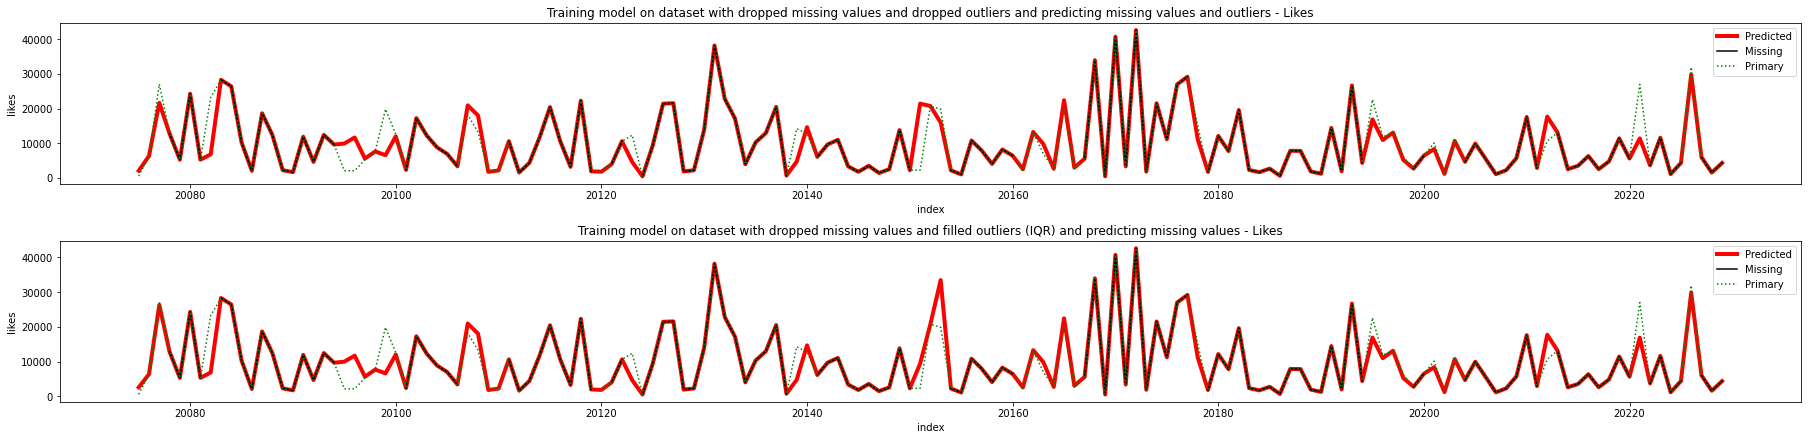

In [ ]:
# Making Dataframes
df_1 = fillWithModel(CAvideos_clean_final, 'likes', QuantileTransformer(random_state=seed), KNeighborsRegressor(n_neighbors=3), outlier_IQR_NA(CAvideos, 'likes'))
df_2 = fillWithModel(CAvideos_filled_outliers_IQR, 'likes', QuantileTransformer(random_state=seed), KNeighborsRegressor(n_neighbors=3), CAvideos)

# # Plotting results
fig, axs = plt.subplots(2, 1, figsize=(25,6), constrained_layout=True)
axs = axs.flatten()

primary = df.sort_values(['views', 'video_id']).reset_index(drop=True)
original = CAvideos.sort_values(['views', 'video_id']).reset_index(drop=True)
df_1 = df_1.sort_values(['views', 'video_id']).reset_index(drop=True)
df_2 = df_2.sort_values(['views', 'video_id']).reset_index(drop=True)

primary = primary.iloc[20075:20230]
original = original.iloc[20075:20230]
df_1 = df_1.iloc[20075:20230]
df_2 = df_2.iloc[20075:20230]

df_1['likes'].plot(ax=axs[0], color='red', lw=4, label='Predicted')
original['likes'].plot(ax=axs[0], color='black', label='Missing')
primary['likes'].plot(ax=axs[0], color='green', label='Primary', linestyle='dotted')
axs[0].set(title='Training model on dataset with dropped missing values and dropped outliers and predicting missing values and outliers - Likes', ylabel="likes", xlabel='index')
axs[0].legend()

df_2['likes'].plot(ax=axs[1], color='red', lw=4, label='Predicted')
original['likes'].plot(ax=axs[1], color='black', label='Missing')
primary['likes'].plot(ax=axs[1], color='green', label='Primary', linestyle='dotted')
axs[1].set(title='Training model on dataset with dropped missing values and filled outliers (IQR) and predicting missing values - Likes', ylabel="likes", xlabel='index')
axs[1].legend()

plt.show()

So, as you can see in our case, predicting outliers using a trained model with dropped outliers and dropped missing values yields different results from the trained model with filled outliers.<br>
A part of the results are shown in the plot above which doesn't represent the overall performance. So, in order to find out which one performed better, we use RMSE:

In [ ]:
y_true = primary['likes'].values

y_pred_df1 = df_1['likes'].values
y_pred_df2 = df_2['likes'].values

RMSE_df_1 = mean_squared_error(y_true = y_true, y_pred = y_pred_df1, squared=False)
RMSE_df_2 = mean_squared_error(y_true = y_true, y_pred = y_pred_df2, squared=False)

print(RMSE_df_1)
print(RMSE_df_2)

3172.5637795769953
2835.0969102171057


Therefore, again, instead of dropping outliers and training the model, it's better to fill in the outliers using IQR and then train the model.

Now, let's fill outlier values for columns of `dislikes`, `views` and `comment_count` using IQR:

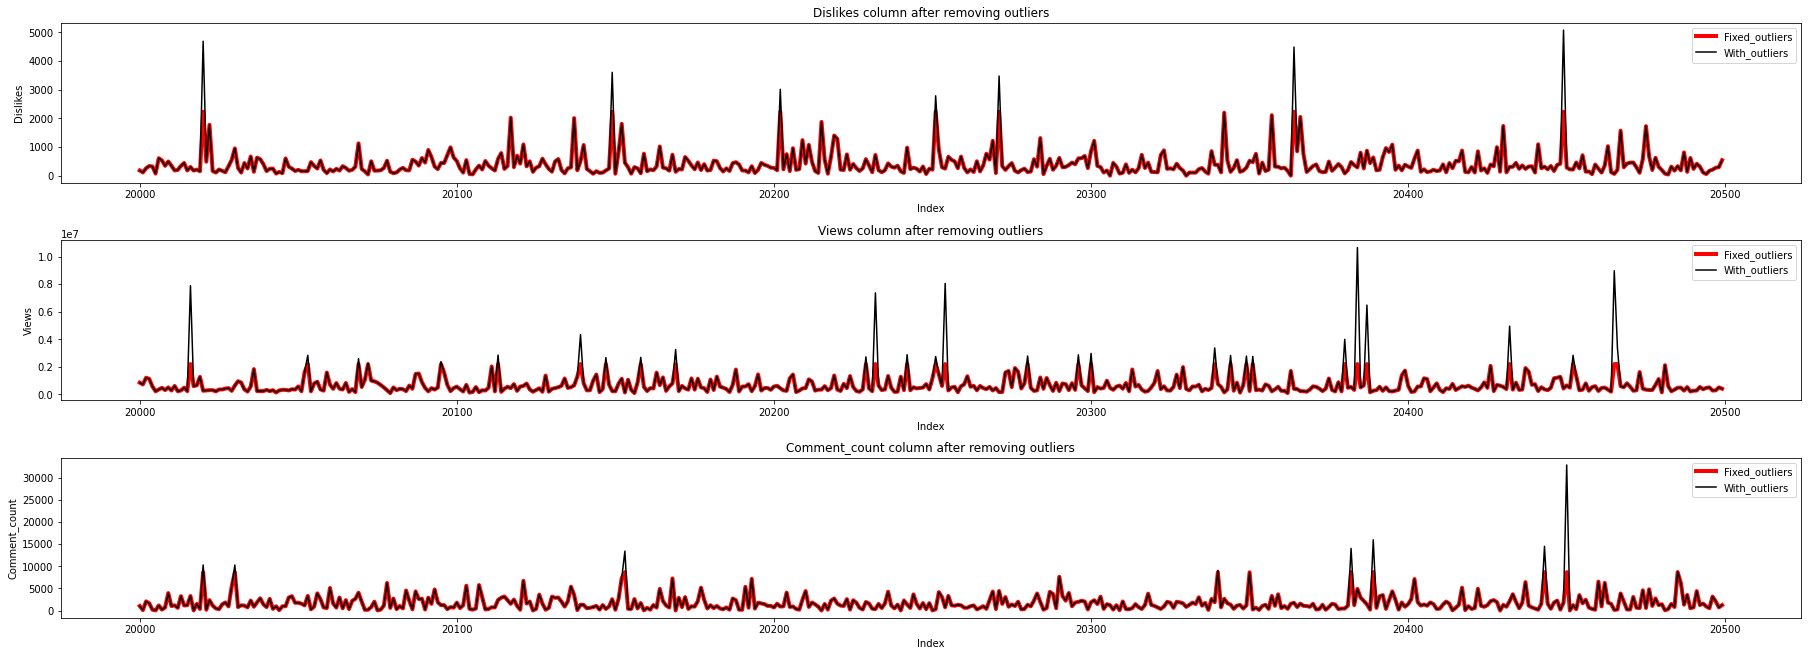

In [ ]:
# Plotting a part of 'likes' column with outliers and with replaced outliers
filled_temp_dislikes = outlier_IQR_fill(CAvideos, 'dislikes')
filled_temp_views = outlier_IQR_fill(CAvideos, 'views')
filled_temp_comments = outlier_IQR_fill(CAvideos, 'comment_count')


filled_temp_dislikes = filled_temp_dislikes.sort_values(['views', 'video_id']).reset_index(drop=True)
filled_temp_comments = filled_temp_comments.sort_values(['views', 'video_id']).reset_index(drop=True)
CAvideos_temp = CAvideos.sort_values(['views', 'video_id']).reset_index(drop=True)

filled_temp_views = filled_temp_views.sort_values(['likes', 'video_id']).reset_index(drop=True)
CAvideos_temp_view = CAvideos.sort_values(['likes', 'video_id']).reset_index(drop=True)


filled_temp_dislikes = filled_temp_dislikes.iloc[20000: 20500]
filled_temp_comments = filled_temp_comments.iloc[20000: 20500]
CAvideos_temp = CAvideos_temp.iloc[20000: 20500]

filled_temp_views = filled_temp_views.iloc[20000: 20500]
CAvideos_temp_view = CAvideos_temp_view.iloc[20000:20500]

# Plotting results
fig, axs = plt.subplots(3, 1, figsize=(25,9), constrained_layout=True)
axs = axs.flatten()

filled_temp_dislikes['dislikes'].plot(ax=axs[0], color='red', lw=4, label='Fixed_outliers')
CAvideos_temp['dislikes'].plot(ax=axs[0], color='black', label='With_outliers')
ax=axs[0].set(title='Dislikes column after removing outliers', xlabel='Index', ylabel='Dislikes')
ax=axs[0].legend()

filled_temp_views['views'].plot(ax=axs[1], color='red', lw=4, label='Fixed_outliers')
CAvideos_temp_view['views'].plot(ax=axs[1], color='black', label='With_outliers')
ax=axs[1].set(title='Views column after removing outliers', xlabel='Index', ylabel='Views')
ax=axs[1].legend()

filled_temp_comments['comment_count'].plot(ax=axs[2], color='red', lw=4, label='Fixed_outliers')
CAvideos_temp['comment_count'].plot(ax=axs[2], color='black', label='With_outliers')
ax=axs[2].set(title='Comment_count column after removing outliers', xlabel='Index', ylabel='Comment_count')
ax=axs[2].legend()
plt.show()

### filling missing values in the column `category id`

first explore which combination of `classifier` and `data scaling technique` is most efficient for filling missing values in the column `category-id`. the data scaling techniques I use include: `MinMaxScaler`, `Normalizer`, `MaxAbsScaler`, `RobustScaler`, `QuantileTransformer`. for classification I use `KNeighborsClassifier`, and `SGDClassifier`. the evaluation metric I use is `f1_weighted`. The F1 score is a popular metric for evaluating the performance of a classification model. The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s support.Support refers to the number of actual occurrences of the class in the dataset.

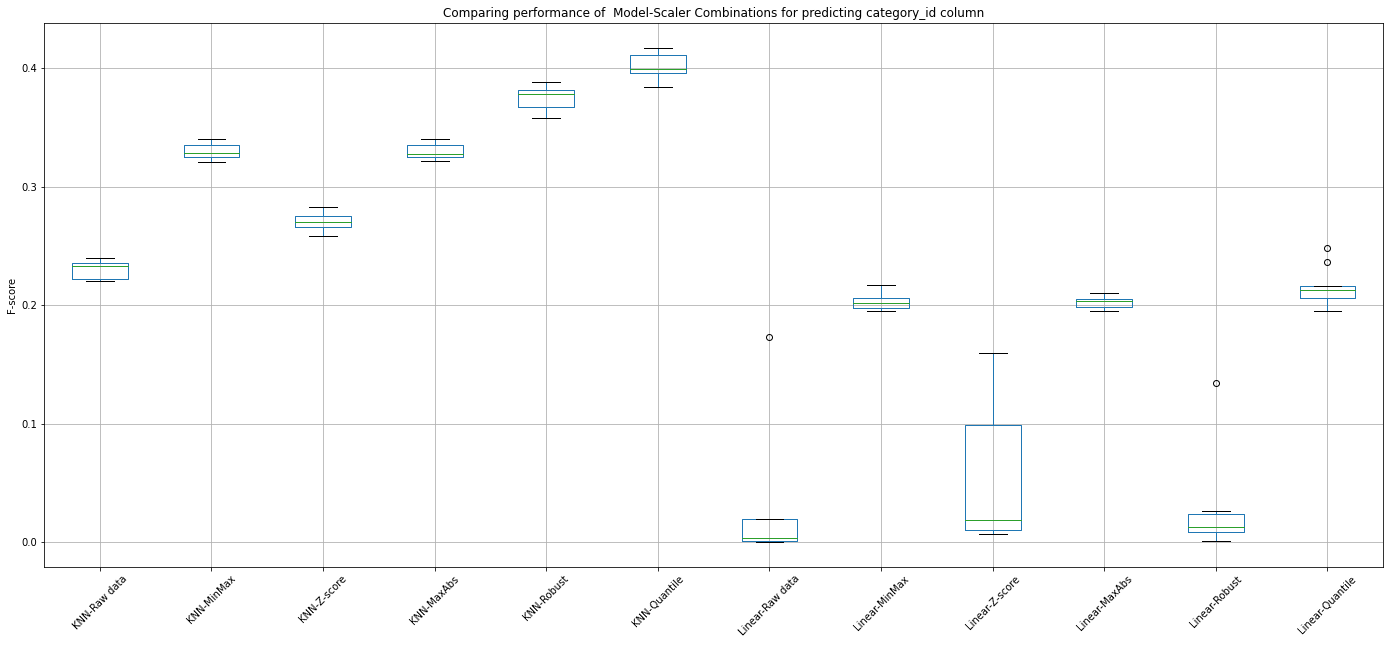

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

X = CAvideos_clean_final
cols = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'durationday']
cols.remove('category_id')
y = X[['category_id']]
X = X[cols]

y = y.to_numpy()

# Encoding columns
le = LabelEncoder() 
X['comments_disabled'] = le.fit_transform(X['comments_disabled'])
X['ratings_disabled'] = le.fit_transform(X['ratings_disabled'])
X['video_error_or_removed'] = le.fit_transform(X['video_error_or_removed'])

# Defining Scaler Names for Plotting
scaler_names = ['Raw data', 'MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']

# Defining Scalers
arr_scalers = [-1, MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(random_state=seed)]

# Defining Models
models = [KNeighborsClassifier(n_neighbors=3), SGDClassifier(loss="squared_error", penalty="l2", max_iter=500)]

# This List Contains Final Results for Plotting
results = [{}, {}]

for j in range(len(models)):
    for i in range (len(arr_scalers)):
      
      # Performing Scaling
      if(i!=0):
        X_new = arr_scalers[i].fit_transform(X)
      else:
        X_new = X

       # Performing Cross-Validation using Selected Model
      model = models[j]
      cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
      scores = cross_val_score(model, X_new, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

     # Adding Results to the Result List for Plotting
      if(j==0):
         results[j][f'KNN-{scaler_names[i]}'] = [abs(elem) for elem in scores]
      else:
         results[j][f'Linear-{scaler_names[i]}'] = [abs(elem) for elem in scores]

# Merging two dictionaries into one (results[0]) for plotting
results[0].update(results[1])

# Creating a DataFrame from results[0] dictionary 
df_res = pd.DataFrame(results[0])

#ploting boxplots
fig, ax = plt.subplots(figsize =(24, 10))
out = df_res.boxplot(rot=45)
ax.set(title=f'Comparing performance of  Model-Scaler Combinations for predicting category_id column', ylabel='F-score')
plt.show()


as we can see in the plot, the combination of KNN classifier(as classification method) and quantile transformer (as data scaling technique), works best for predicing `category_id`. let's take a closer look: 

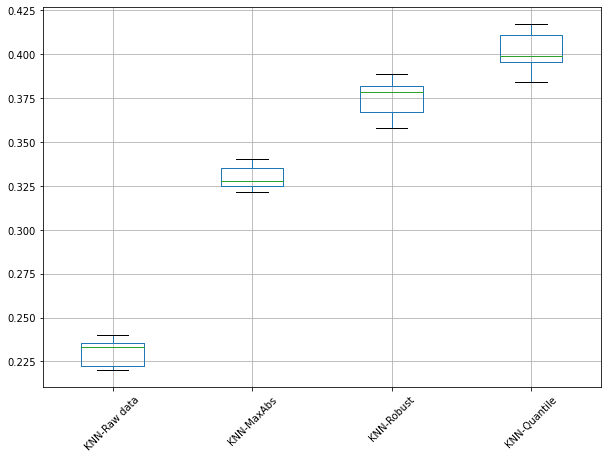

In [ ]:
# Keeping 'KNN-Rawdata', 'KNN-Robust', 'KNN-MaxAbs','KNN-Quantile' in our dictionary
new_dict = dict((key,value) for key, value in results[0].items() if (key in ['KNN-Raw data', 'KNN-Robust', 'KNN-MaxAbs', 'KNN-Quantile']))

# Creating a DataFrame from results[0] dictionary
df_res = pd.DataFrame(new_dict)

# Plotting
fig = plt.figure(figsize =(10, 7))
out = df_res.boxplot(rot=45)

As we can see in the above plot for the KNN, the quantile transformer increased the performance to around 40% from 20% using the variables in its raw form. 

filling missing values in the `category_id` column usin KNN classifier and quantile transformer: first, we should transform the data(using quantile transformer) in the columns we choose as X, train the KNN cassifier on the rows that the `category_id` is not missing, and then predict the missing values in the `category_id` using the trained model. 
<br>
we use these columns to predict `category_id`: `likes`, `views`, `dislikes`, `comment_count`, `comments_disabled`, `ratings_disabled`, `video_error_or_removed`, `durationday`
<br>
in our main dataset `CAvideos`, we have missing values in the column `likes`, and outliers in most of the listed columns we will use as X attributes. first we fill missing values in `likes` column with `median`(as we concluded in task2), and fill the outliers with `IQR`, to be able to train the model and predict efficiently.

In [ ]:
# fill the missing values in 'likes' column with median 
CAvideos_train = CAvideos2.copy()
median = CAvideos_train.dropna()['likes'].median()
CAvideos_train['likes'].fillna(median,inplace=True)

#fill the outliers in columns 'likes', 'views', 'dislikes', 'comment_count'
CAvideos_train = outlier_IQR_fill(CAvideos_train, 'likes')
CAvideos_train = outlier_IQR_fill(CAvideos_train, 'views')
CAvideos_train = outlier_IQR_fill(CAvideos_train, 'dislikes')
CAvideos_train = outlier_IQR_fill(CAvideos_train, 'comment_count')

rows_to_fix = CAvideos_train[CAvideos_train.isna().any(axis=1)]
CAvideos_train_dropped = CAvideos_train.dropna()

#encoding some of the columns
le = LabelEncoder() 
CAvideos_train_dropped['comments_disabled'] = le.fit_transform(CAvideos_train_dropped['comments_disabled'])
CAvideos_train_dropped['ratings_disabled'] = le.fit_transform(CAvideos_train_dropped['ratings_disabled'])
CAvideos_train_dropped['video_error_or_removed'] = le.fit_transform(CAvideos_train_dropped['video_error_or_removed'])

#split x and y for training
Y_categ = CAvideos_train_dropped['category_id']
cols = ['likes', 'views', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'durationday']
CAvideos_train_dropped = CAvideos_train_dropped[cols]
X_categ = CAvideos_train_dropped

scl = QuantileTransformer()
#transform data with quantile transformer
X_t = scl.fit_transform(X_categ)

#build and train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_t, Y_categ)

#forecast the rows with missing values
X_pred = scl.transform(rows_to_fix[cols])
Y_pred = model.predict(X_pred)

#put the rows back with the forecasted values
rows_to_fix['category_id'] = Y_pred

# fill the missing values of the column 'category_id' in the main dataset
CAvideos3 = CAvideos2.copy()
CAvideos3['category_id'] = CAvideos3['category_id'].fillna(rows_to_fix['category_id'])


## Task4 (Feature Selection)

for this task, the target variable that we have chosen to forecast is 'Category_id'. we want to predict the category of a trending video based on the number of views,likes, dislikes, comment_counts, how long it takes until a video become trending since it published(durationday) and whether the comment disabeled or not, the rating disabled or not, and video has error/removed or not. 
<br>
first we try Linear Discriminant Analysis, or LDA, as a technique for feature selection. LDA, is a linear machine learning algorithm used for multi-class classification. predicting category_id is also a multi-class classification problem.

In [ ]:
#computing the F1-score for the baseline model using repeated cross validation (we've chosen the selected model in part3())
#X_categ includes all the features for predicting 'category_id' column: ['likes', 'views', 'dislikes', 'comment_count', 'comments_disabled','ratings_disabled', 'video_error_or_removed', 'durationday']
X = CAvideos_clean_final
cols = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'durationday']
cols.remove('category_id')
y = X[['category_id']]
#X = X[cols]

Y_categ = y.to_numpy()

# Encoding columns
le = LabelEncoder() 
X['comments_disabled'] = le.fit_transform(X['comments_disabled'])
X['ratings_disabled'] = le.fit_transform(X['ratings_disabled'])
X['video_error_or_removed'] = le.fit_transform(X['video_error_or_removed'])

X_categ = X[cols]

scl = QuantileTransformer()
X_t = scl.fit_transform(X_categ)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_t, Y_categ, scoring='f1_weighted', cv=cv)
results = {}
results['baseline_model'] = scores

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_t = scl.fit_transform(X_categ)
lda.fit(X_t, Y_categ)
X_transformed = lda.transform(X_t)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_transformed, Y_categ, scoring='f1_weighted', cv=cv)
results['LDA'] = scores

Text(0, 0.5, 'F_score')

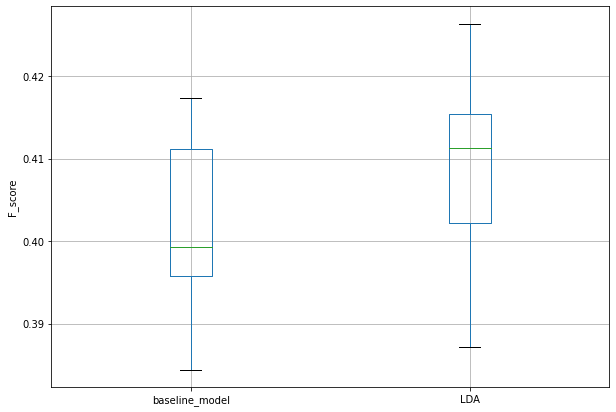

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
df_res = pd.DataFrame(results)
df_res.boxplot( ax=ax)
ax.set_ylabel('F_score')

As we see in the above plot, using LDA as a feature selection method improves a little(approximately 1 percent) our baseline model. so, let's try other feature selection methods to see which one perform best in our dataset. 

first we try filtering approache, and use Univariate feature selection method by different scoring functions(chi2, f_classif, mutual_info_classif). we examine this method with different number of selected best features. we have 8 features, and examine the method for selected best features in the list: [1,2,3,4,5,6,7,8]

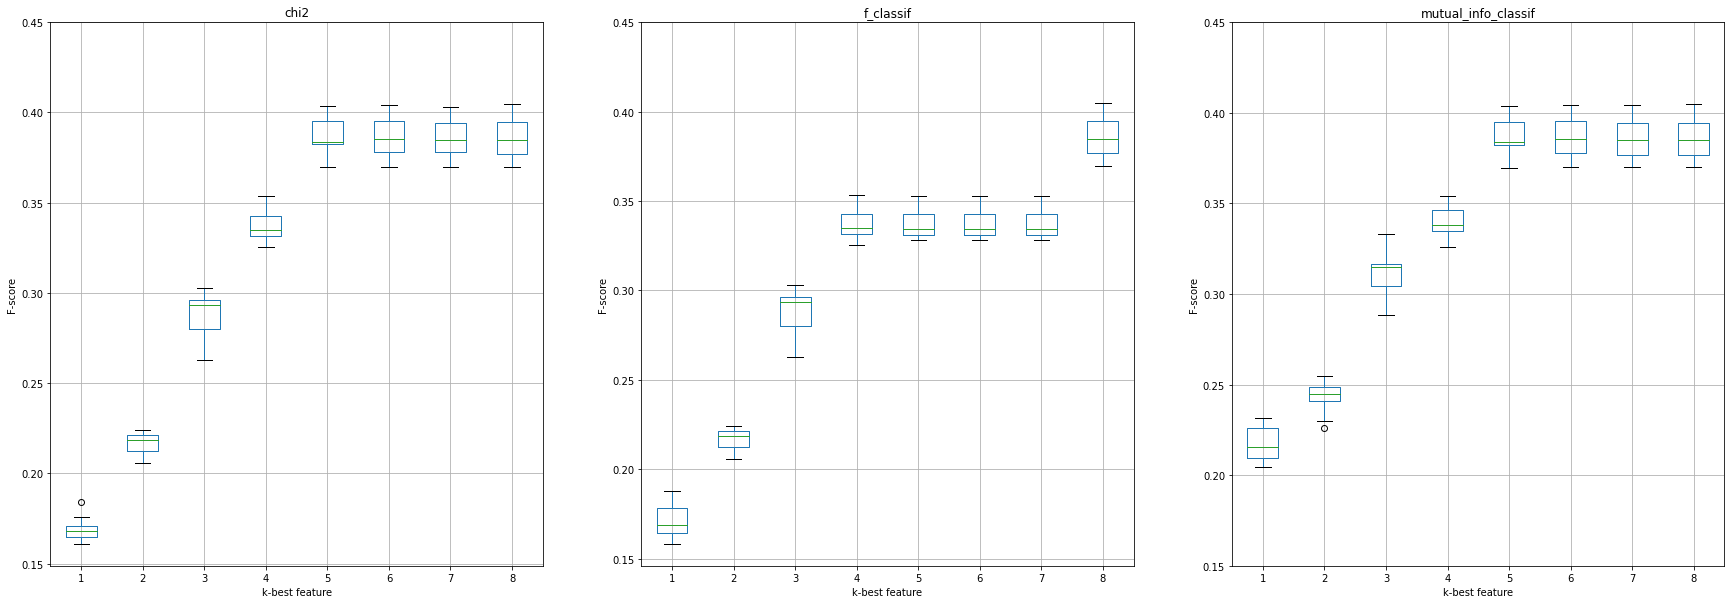

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

scaler = QuantileTransformer()
model = KNeighborsClassifier(n_neighbors=3)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

X_categ[X_categ['durationday']<0] = 1
# the number of best features
k_best = [1, 2, 3, 4, 5, 6, 7, 8]

def select_features(X, y, score_function, k):
    sel = SelectKBest(score_func=score_function, k=k)
    # learn relationship from training data
    X_sel = sel.fit_transform(X, y)
    return X_sel

def result(score_function):
    results={}
    for i in range(len(k_best)):
        num_feature = k_best[i]
        X_sel = select_features(X_categ, Y_categ, score_function, num_feature)
        best_X_scaled = scaler.fit_transform(X_sel)
        scores = cross_val_score(model, best_X_scaled,Y_categ, scoring='f1_weighted', cv=cv, n_jobs=-1)
        results[num_feature] = scores
    return results

def plot(score_function,ind,title):
    results = result(score_function)
    df_res = pd.DataFrame(results)
    df_res.boxplot(ax=axs[ind]) 
    axs[ind].yaxis.set_ticks(np.arange(0.15, 0.45, 0.05))
    axs[ind].set_ylabel('F-score')
    axs[ind].set_xlabel('k-best feature')
    axs[ind].set_title(title)

fig, axs = plt.subplots(1,3,figsize=(30,10))    
plot(chi2, 0,'chi2')
plot(f_classif, 1,'f_classif')
plot(mutual_info_classif, 2, 'mutual_info_classif')

AS we can see from the above plot the the f-score obtained by applying Univariate feature selection method, do not exceed 0.4 in the best cases. compared to our baseline model, this feature selection method do not improve the performance of our model.
<br>
It seems that the main reason why the feature selection methods do not improve our baseline model is that the number of the features we use for predicting is not so many, and all of them is required for predicting 